# Auditoría energética


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

## Preparación de datos

In [2]:
data2018 = pd.read_csv("2018Floor2.csv", parse_dates = ["Date"])
data2019 = pd.read_csv("2019Floor2.csv", parse_dates = ["Date"])
data2018_2019 = pd.concat([data2018,data2019],axis=0).reset_index(drop=True)
data2018_2019

,Date,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),...,z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux)
0,2018-07-01 00:00:00,0.0,0.01,0.15,28.36,58.93,0.0,1.08,0.0,0.0,...,0.32,29.30,68.22,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2018-07-01 00:01:00,0.0,0.01,0.15,28.36,58.91,0.0,1.07,0.0,0.0,...,0.32,29.30,68.21,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2018-07-01 00:02:00,0.0,0.01,0.15,28.36,58.94,0.0,0.88,0.0,0.0,...,0.28,29.29,68.24,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,2018-07-01 00:03:00,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,...,0.32,29.29,68.28,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2018-07-01 00:04:00,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,...,0.32,29.29,68.30,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790555,2019-12-31 23:55:00,0.0,0.01,0.18,27.65,61.50,0.0,1.12,0.0,0.0,...,0.24,28.34,58.94,0.0,0.0,0.0,0.0,27.81,55.30,0.0
790556,2019-12-31 23:56:00,0.0,0.01,0.18,27.66,61.45,0.0,1.13,0.0,0.0,...,0.24,28.34,58.36,0.0,0.0,0.0,0.0,27.81,55.60,0.0
790557,2019-12-31 23:57:00,0.0,0.01,0.18,27.65,61.49,0.0,1.16,0.0,0.0,...,0.24,28.37,57.74,0.0,0.0,0.0,0.0,27.80,55.10,0.0
790558,2019-12-31 23:58:00,0.0,0.01,0.18,27.66,61.50,0.0,1.17,0.0,0.0,...,0.24,28.35,57.83,0.0,0.0,0.0,0.0,27.82,55.80,0.0


In [3]:
data = data2018_2019.copy()

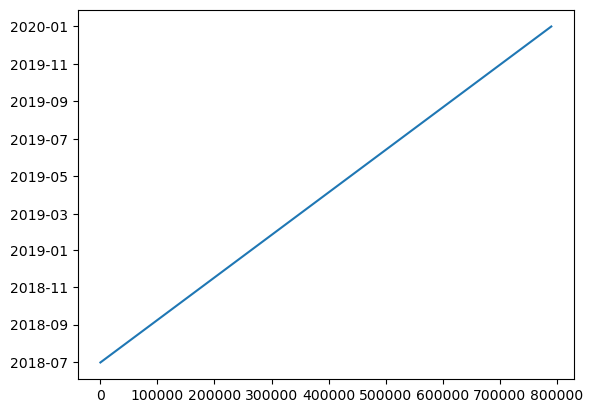

In [4]:
#Continuidad de datos en el tiempo
plt.plot(data["Date"])
plt.show()

## Manipulación de atributos

In [5]:
# Columnas de interés (kW)
i_columns = ['Date', 'z1_AC1(kW)', 'z1_Light(kW)', 'z1_Plug(kW)',
            'z2_AC1(kW)', 'z2_AC2(kW)', 'z2_AC3(kW)',
       'z2_AC4(kW)', 'z2_AC5(kW)', 'z2_AC6(kW)', 'z2_AC7(kW)', 'z2_AC8(kW)',
       'z2_AC9(kW)', 'z2_AC10(kW)', 'z2_AC11(kW)', 'z2_AC12(kW)',
       'z2_AC13(kW)', 'z2_AC14(kW)', 'z2_Light(kW)', 'z2_Plug(kW)',
            'z3_Light(kW)', 'z3_Plug(kW)','z4_AC1(kW)', 'z4_Light(kW)', 'z4_Plug(kW)']

In [6]:
# Se filtran las columnas de interés
data = data[i_columns]

In [7]:
# Fracción dee datos no nulos
print(data.dropna().shape[0]/data.shape[0])

0.9612451932807125


In [8]:
# Se eliminan datos NaN
data.dropna(inplace=True)

In [9]:
data

,Date,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_AC5(kW),z2_AC6(kW),...,z2_AC12(kW),z2_AC13(kW),z2_AC14(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_AC1(kW),z4_Light(kW),z4_Plug(kW)
0,2018-07-01 00:00:00,0.0,0.01,0.15,1.08,0.0,0.0,0.0,1.29,1.26,...,0.0,0.0,0.0,0.0,0.10,0.01,0.32,0.0,0.0,0.0
1,2018-07-01 00:01:00,0.0,0.01,0.15,1.07,0.0,0.0,0.0,1.30,1.24,...,0.0,0.0,0.0,0.0,0.10,0.01,0.32,0.0,0.0,0.0
2,2018-07-01 00:02:00,0.0,0.01,0.15,0.88,0.0,0.0,0.0,1.09,1.03,...,0.0,0.0,0.0,0.0,0.09,0.01,0.28,0.0,0.0,0.0
3,2018-07-01 00:03:00,0.0,0.01,0.15,1.06,0.0,0.0,0.0,1.29,1.23,...,0.0,0.0,0.0,0.0,0.09,0.01,0.32,0.0,0.0,0.0
4,2018-07-01 00:04:00,0.0,0.01,0.15,1.06,0.0,0.0,0.0,1.26,1.24,...,0.0,0.0,0.0,0.0,0.09,0.01,0.32,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790555,2019-12-31 23:55:00,0.0,0.01,0.18,1.12,0.0,0.0,0.0,1.41,1.20,...,0.0,0.0,0.0,0.0,0.07,0.19,0.24,0.0,0.0,0.0
790556,2019-12-31 23:56:00,0.0,0.01,0.18,1.13,0.0,0.0,0.0,1.40,1.22,...,0.0,0.0,0.0,0.0,0.07,0.19,0.24,0.0,0.0,0.0
790557,2019-12-31 23:57:00,0.0,0.01,0.18,1.16,0.0,0.0,0.0,1.41,1.24,...,0.0,0.0,0.0,0.0,0.07,0.19,0.24,0.0,0.0,0.0
790558,2019-12-31 23:58:00,0.0,0.01,0.18,1.17,0.0,0.0,0.0,1.40,1.26,...,0.0,0.0,0.0,0.0,0.07,0.18,0.24,0.0,0.0,0.0


In [10]:
# Columnas de las correspondientes zonas
z1 = ['z1_AC1(kW)', 'z1_Light(kW)', 'z1_Plug(kW)']
z2 = ['z2_AC1(kW)', 'z2_AC2(kW)', 'z2_AC3(kW)',
       'z2_AC4(kW)', 'z2_AC5(kW)', 'z2_AC6(kW)', 'z2_AC7(kW)', 'z2_AC8(kW)',
       'z2_AC9(kW)', 'z2_AC10(kW)', 'z2_AC11(kW)', 'z2_AC12(kW)',
       'z2_AC13(kW)', 'z2_AC14(kW)', 'z2_Light(kW)', 'z2_Plug(kW)']
z3 = ['z3_Light(kW)', 'z3_Plug(kW)']
z4 = ['z4_AC1(kW)', 'z4_Light(kW)', 'z4_Plug(kW)']

In [11]:
# Consumo por zona
for i,j in zip(range(1,5),[z1,z2,z3,z4]):
  data[f"z{i}(kW)"] = data[j].sum(axis=1)

# Consumo del piso
data["Total_piso(kW)"] = data[z1+z2+z3+z4].sum(axis=1)

In [12]:
# Columnas con consumo de potencia (kw)
kw_columns = list(data.columns[1:])

# Nombre de columnas con consumo de energía (kwh)
kwh_columns = [i[:-4]+"(kWh)" for i in kw_columns]

In [13]:
data

,Date,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_AC5(kW),z2_AC6(kW),...,z3_Light(kW),z3_Plug(kW),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z1(kW),z2(kW),z3(kW),z4(kW),Total_piso(kW)
0,2018-07-01 00:00:00,0.0,0.01,0.15,1.08,0.0,0.0,0.0,1.29,1.26,...,0.01,0.32,0.0,0.0,0.0,0.16,7.55,0.33,0.0,8.04
1,2018-07-01 00:01:00,0.0,0.01,0.15,1.07,0.0,0.0,0.0,1.30,1.24,...,0.01,0.32,0.0,0.0,0.0,0.16,7.53,0.33,0.0,8.02
2,2018-07-01 00:02:00,0.0,0.01,0.15,0.88,0.0,0.0,0.0,1.09,1.03,...,0.01,0.28,0.0,0.0,0.0,0.16,6.28,0.29,0.0,6.73
3,2018-07-01 00:03:00,0.0,0.01,0.15,1.06,0.0,0.0,0.0,1.29,1.23,...,0.01,0.32,0.0,0.0,0.0,0.16,7.45,0.33,0.0,7.94
4,2018-07-01 00:04:00,0.0,0.01,0.15,1.06,0.0,0.0,0.0,1.26,1.24,...,0.01,0.32,0.0,0.0,0.0,0.16,7.40,0.33,0.0,7.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790555,2019-12-31 23:55:00,0.0,0.01,0.18,1.12,0.0,0.0,0.0,1.41,1.20,...,0.19,0.24,0.0,0.0,0.0,0.19,7.74,0.43,0.0,8.36
790556,2019-12-31 23:56:00,0.0,0.01,0.18,1.13,0.0,0.0,0.0,1.40,1.22,...,0.19,0.24,0.0,0.0,0.0,0.19,7.78,0.43,0.0,8.40
790557,2019-12-31 23:57:00,0.0,0.01,0.18,1.16,0.0,0.0,0.0,1.41,1.24,...,0.19,0.24,0.0,0.0,0.0,0.19,7.90,0.43,0.0,8.52
790558,2019-12-31 23:58:00,0.0,0.01,0.18,1.17,0.0,0.0,0.0,1.40,1.26,...,0.18,0.24,0.0,0.0,0.0,0.19,7.92,0.42,0.0,8.53


## Análisis y visualización de datos

In [14]:
# Registro de la hora
data["Hora-Fecha"] = data["Date"].dt.strftime('%Y-%m-%d %H')

# Registro del día
data["Día-Fecha"] = data["Date"].dt.strftime('%Y-%m-%d')

# Registro del mes
data["Mes-Fecha"] = data["Date"].dt.strftime('%Y-%m')


In [15]:
data

,Date,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_AC5(kW),z2_AC6(kW),...,z4_Light(kW),z4_Plug(kW),z1(kW),z2(kW),z3(kW),z4(kW),Total_piso(kW),Hora-Fecha,Día-Fecha,Mes-Fecha
0,2018-07-01 00:00:00,0.0,0.01,0.15,1.08,0.0,0.0,0.0,1.29,1.26,...,0.0,0.0,0.16,7.55,0.33,0.0,8.04,2018-07-01 00,2018-07-01,2018-07
1,2018-07-01 00:01:00,0.0,0.01,0.15,1.07,0.0,0.0,0.0,1.30,1.24,...,0.0,0.0,0.16,7.53,0.33,0.0,8.02,2018-07-01 00,2018-07-01,2018-07
2,2018-07-01 00:02:00,0.0,0.01,0.15,0.88,0.0,0.0,0.0,1.09,1.03,...,0.0,0.0,0.16,6.28,0.29,0.0,6.73,2018-07-01 00,2018-07-01,2018-07
3,2018-07-01 00:03:00,0.0,0.01,0.15,1.06,0.0,0.0,0.0,1.29,1.23,...,0.0,0.0,0.16,7.45,0.33,0.0,7.94,2018-07-01 00,2018-07-01,2018-07
4,2018-07-01 00:04:00,0.0,0.01,0.15,1.06,0.0,0.0,0.0,1.26,1.24,...,0.0,0.0,0.16,7.40,0.33,0.0,7.89,2018-07-01 00,2018-07-01,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790555,2019-12-31 23:55:00,0.0,0.01,0.18,1.12,0.0,0.0,0.0,1.41,1.20,...,0.0,0.0,0.19,7.74,0.43,0.0,8.36,2019-12-31 23,2019-12-31,2019-12
790556,2019-12-31 23:56:00,0.0,0.01,0.18,1.13,0.0,0.0,0.0,1.40,1.22,...,0.0,0.0,0.19,7.78,0.43,0.0,8.40,2019-12-31 23,2019-12-31,2019-12
790557,2019-12-31 23:57:00,0.0,0.01,0.18,1.16,0.0,0.0,0.0,1.41,1.24,...,0.0,0.0,0.19,7.90,0.43,0.0,8.52,2019-12-31 23,2019-12-31,2019-12
790558,2019-12-31 23:58:00,0.0,0.01,0.18,1.17,0.0,0.0,0.0,1.40,1.26,...,0.0,0.0,0.19,7.92,0.42,0.0,8.53,2019-12-31 23,2019-12-31,2019-12


In [16]:
# Se calcula la energía consumida en cada hora
consumo_hora = (data.groupby("Hora-Fecha").mean(numeric_only=True)*1).reset_index()
consumo_hora.columns = [consumo_hora.columns[0]]+kwh_columns

# Se agrupa por hora del día y se calcula consumo promedio y variabilidad
consumo_hora["Hora"] = pd.to_datetime(consumo_hora["Hora-Fecha"]).dt.hour
consumo_medio_hora = consumo_hora[["Hora"]+kwh_columns].groupby("Hora").aggregate(["mean","std"])

In [17]:
consumo_medio_hora
# Crear usando pd.DataFrame

z1_AC1(kWh)            z1_Light(kWh)           z1_Plug(kWh)            \
            mean        std          mean       std         mean       std   
Hora                                                                         
0       0.115369   1.328408      0.022312  0.080108     0.253013  0.097277   
1       0.111886   1.299483      0.022312  0.080074     0.252997  0.097338   
2       0.060033   0.874818      0.022355  0.080293     0.252887  0.097493   
3       0.053401   0.873710      0.022450  0.080119     0.250197  0.094842   
4       0.052581   0.861677      0.022497  0.080204     0.235809  0.078101   
5       0.051026   0.846690      0.196116  0.356071     0.254629  0.095914   
6       0.047274   0.787849      1.372262  1.428317     0.502941  0.338562   
7       4.917276   9.241625      3.030495  2.140713     1.069139  0.653315   
8      23.422747  14.975617      5.291759  3.362286     2.139967  1.341565   
9      21.607889  14.022576      5.705876  3.523014     2.331880  1.459954   
10     21.096081  13.889874      5.762395  3.576536     2.341465  1.466591   
11     20.569062  13.535361      5.830324  3.571438     2.348002  1.463614   
12     20.003962  13.230756      5.893978  3.614379     2.327940  1.452886   
13     20.026094  13.154227      5.816817  3.544306     2.321729  1.445049   
14     19.971707  13.165857      5.862343  3.565943     2.383581  1.488119   
15     19.458836  12.828686      5.864953  3.604047     2.371527  1.484186   
16     17.335162  12.172619      5.598042  3.666217     2.093395  1.343816   
17      5.787528   9.430054      4.308141  3.182826     1.045631  0.732588   
18      4.848566   8.742397      2.680285  2.843704     0.556002  0.464997   
19      3.989690   7.760740      1.691806  2.671934     0.401040  0.316984   
20      1.038756   3.551395      0.345785  0.765017     0.267209  0.107069   
21      0.306514   2.211346      0.030711  0.098515     0.254909  0.096261   
22      0.137116   1.411769      0.023915  0.083918     0.254463  0.096525   
23      0.118422   1.387034      0.022409  0.080364     0.252854  0.097059   

     z2_AC1(kWh)            z2_AC2(kWh)            ...    z1(kWh)             \
            mean        std        mean       std  ...       mean        std   
Hora                                               ...                         
0       0.816783   0.359777    0.606189  0.557658  ...   0.390694   1.347414   
1       0.779393   0.385466    0.647872  0.587300  ...   0.387196   1.318424   
2       0.775180   0.389533    0.645560  0.585168  ...   0.335275   0.896281   
3       0.772675   0.390009    0.643109  0.584218  ...   0.326048   0.895568   
4       0.766968   0.388108    0.642520  0.581735  ...   0.310887   0.880756   
5       0.428006   0.243284    0.858715  0.359262  ...   0.501771   0.948770   
6       0.324069   0.273680    1.023152  0.194577  ...   1.922477   1.870514   
7       3.085647   5.881764    1.020944  0.200293  ...   9.016910  10.313397   
8      13.967298  10.341966    1.002314  0.246556  ...  30.854473  19.332629   
9      14.528245  10.886587    0.997530  0.278102  ...  29.645645  18.667237   
10     14.655544  11.072847    1.007930  0.281260  ...  29.199941  18.628404   
11     14.670404  11.204262    0.934548  0.302898  ...  28.747388  18.251913   
12     14.549175  11.297625    0.714852  0.415175  ...  28.225881  17.949715   
13     14.655234  11.298115    0.699161  0.421687  ...  28.164640  17.816994   
14     14.741956  11.299560    0.707395  0.422965  ...  28.217631  17.878753   
15     14.672766  11.280714    0.703186  0.422001  ...  27.695316  17.581636   
16     13.986911  10.987306    0.708396  0.408280  ...  25.026599  16.857767   
17      2.603034   5.280282    0.489426  0.306510  ...  11.141301  12.049036   
18      1.455597   3.808987    0.186261  0.207689  ...   8.084853  11.439443   
19      1.213848   3.293382    0.150492  0.194433  ...   6.082535  10.399939   
20      0.715133   1.022852    0.144050  0.178714  ...   1

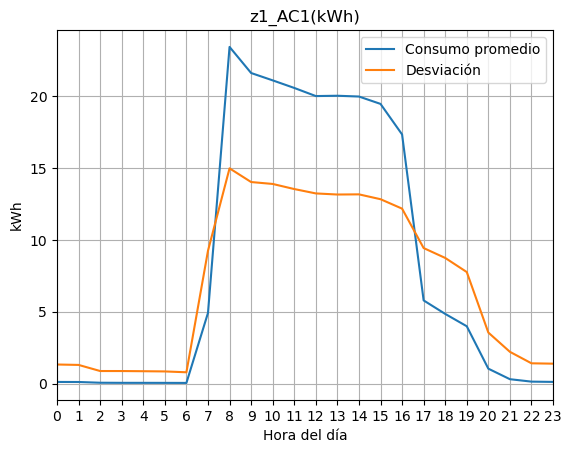

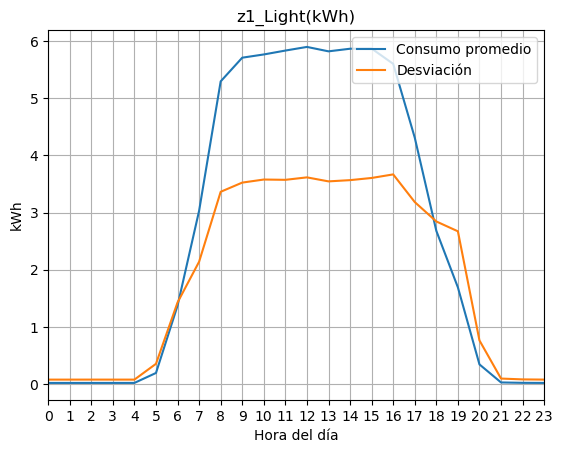

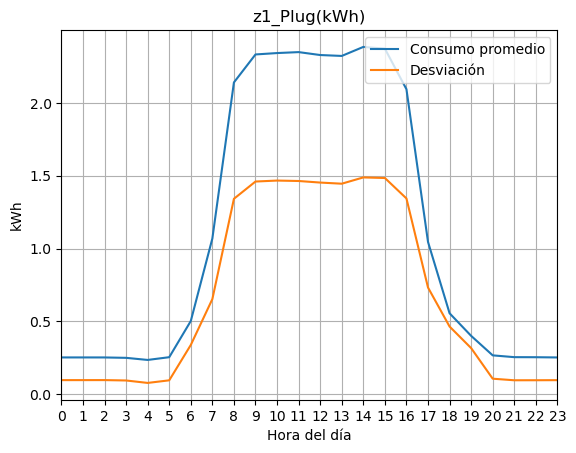

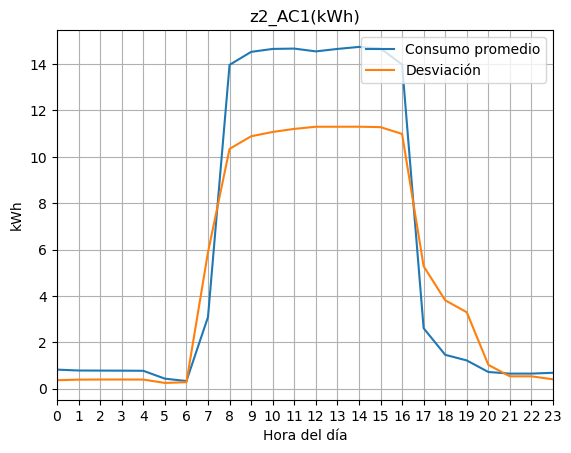

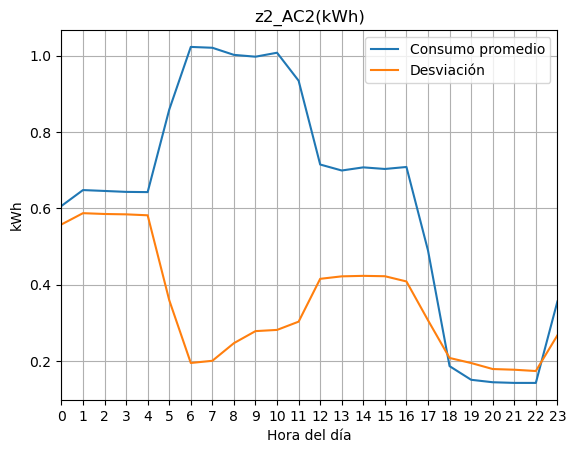

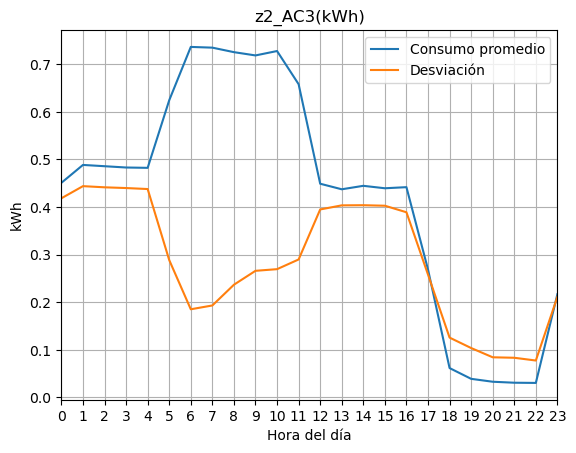

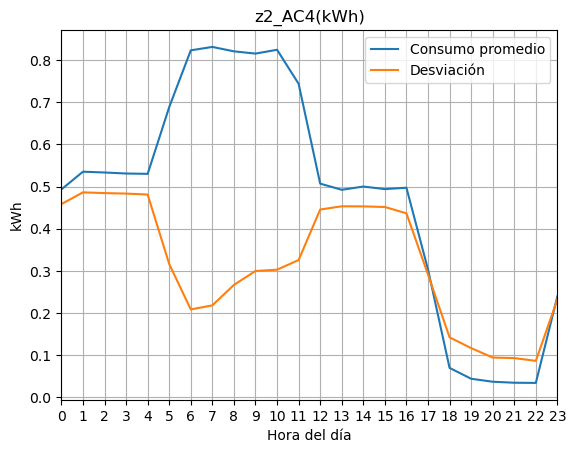

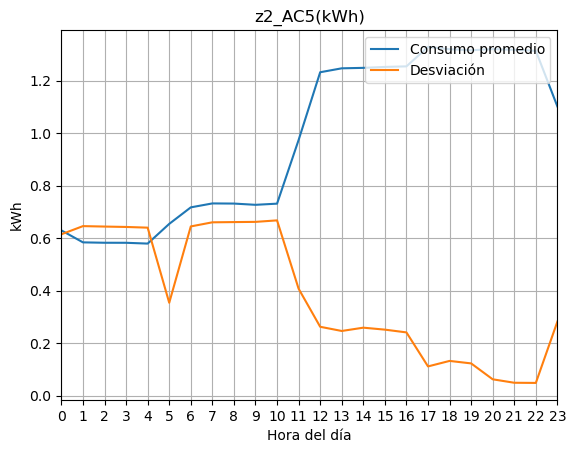

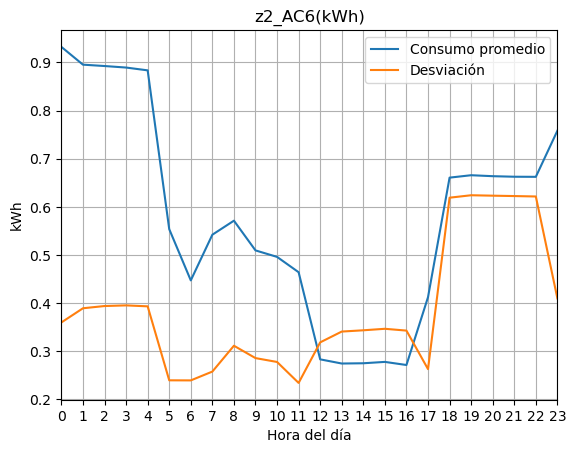

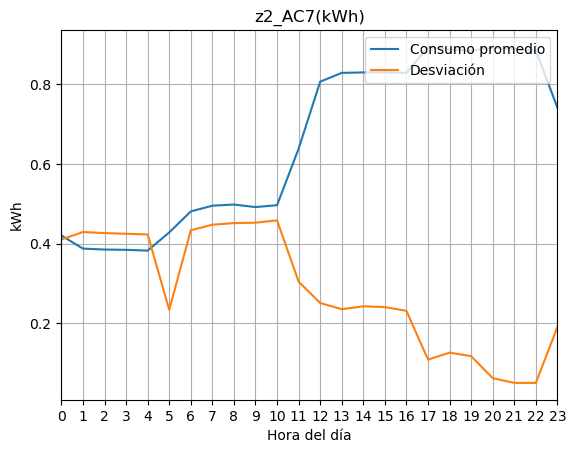

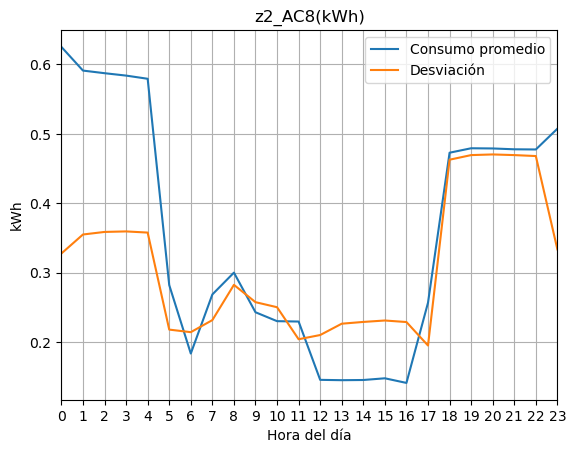

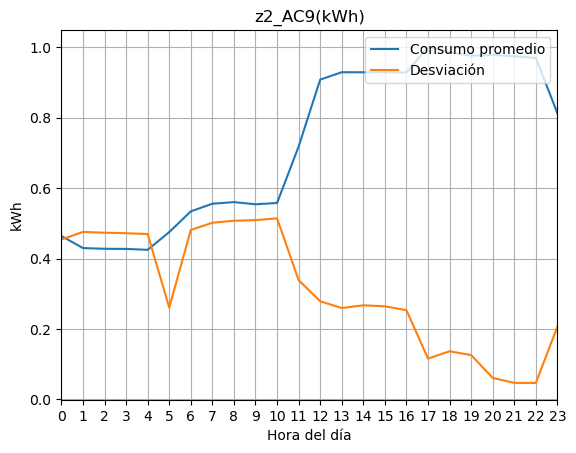

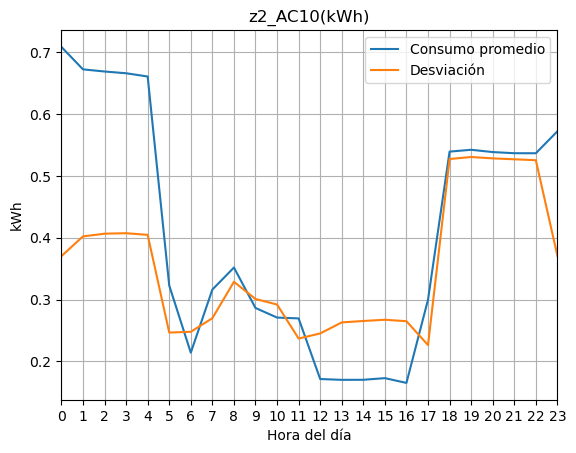

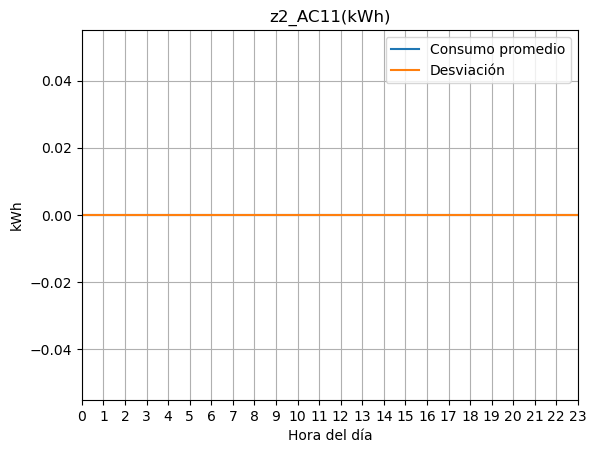

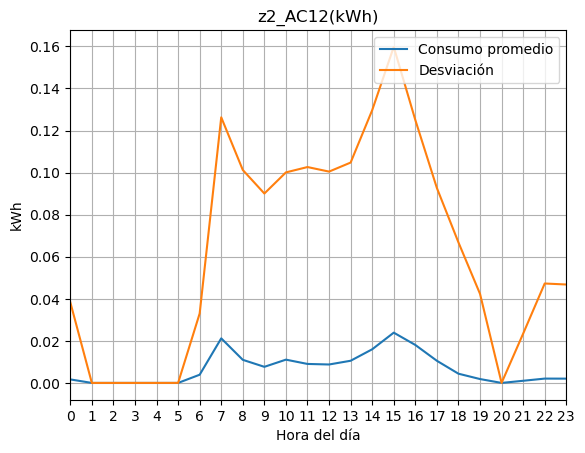

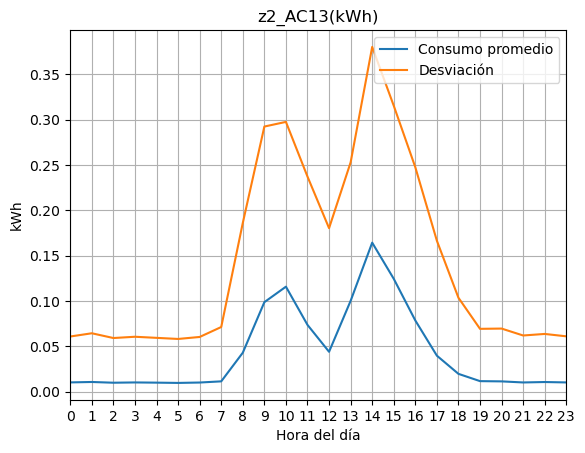

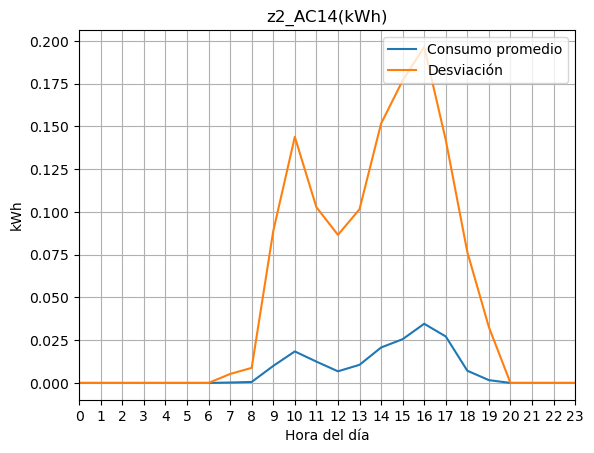

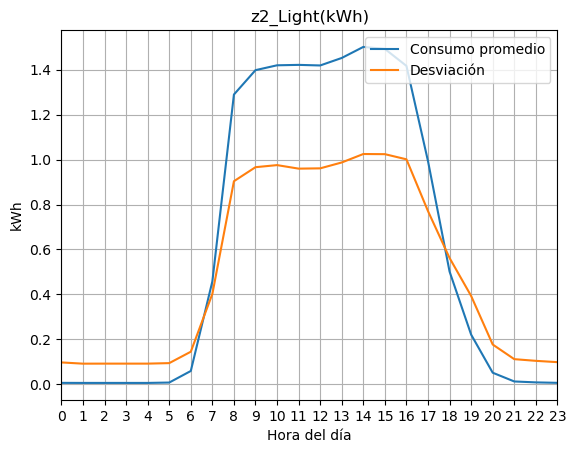

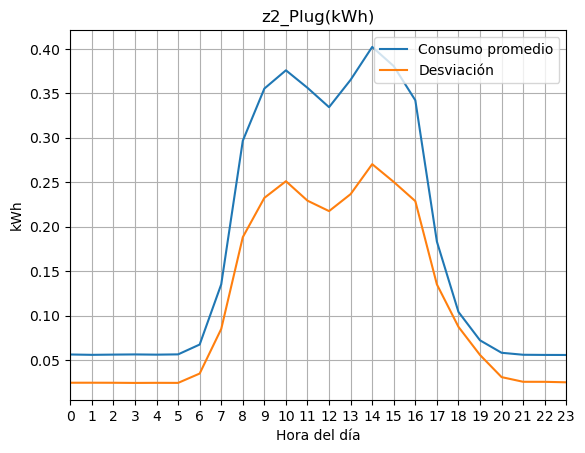

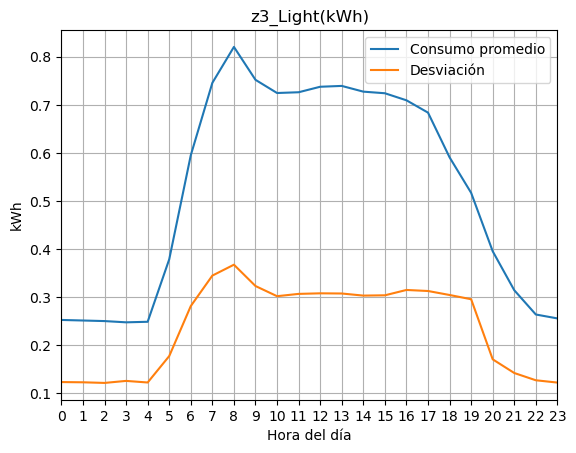

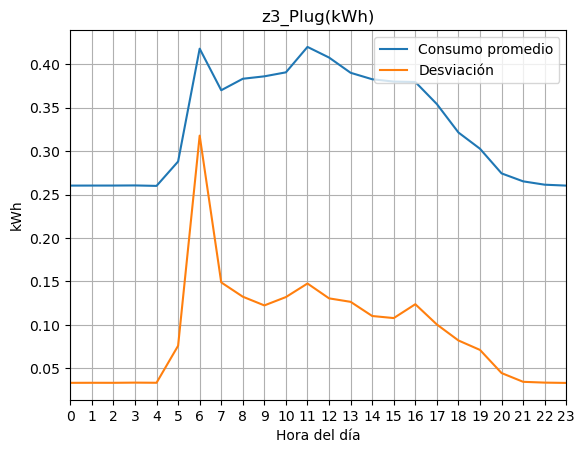

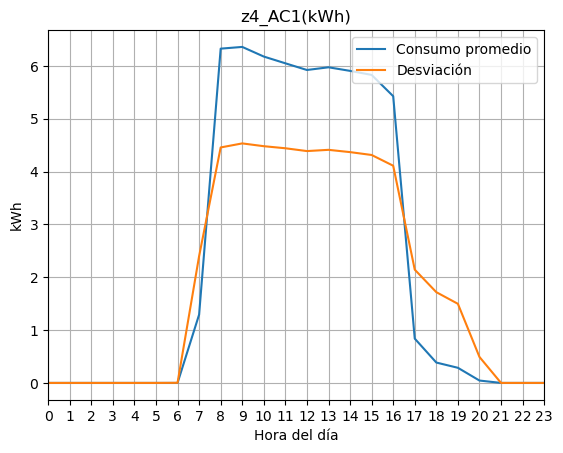

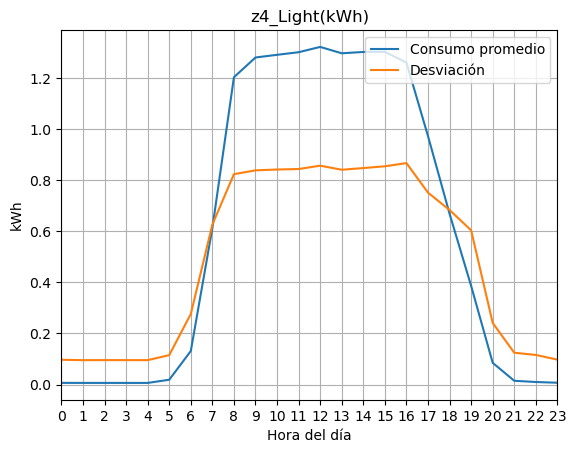

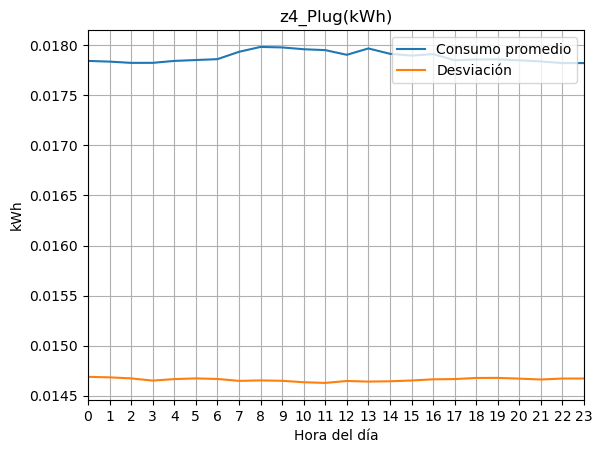

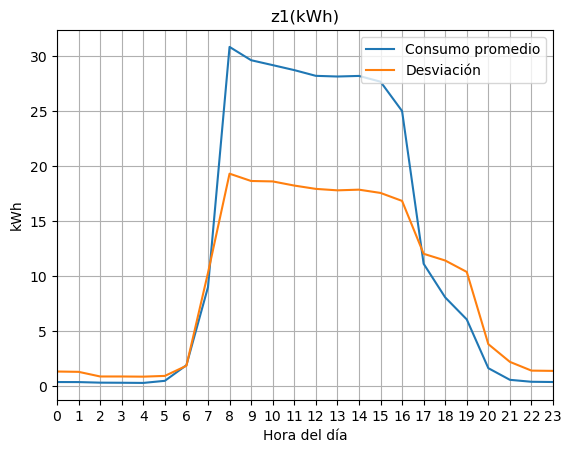

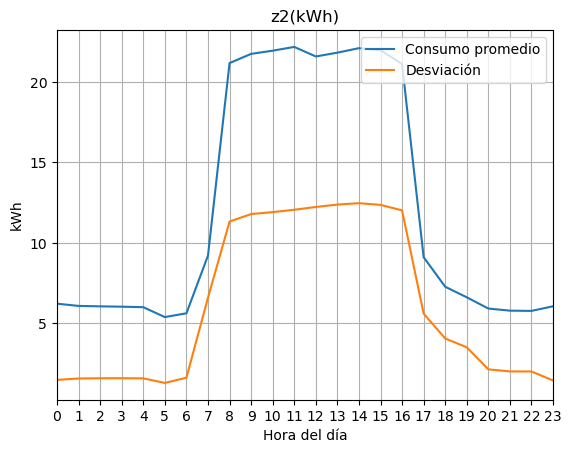

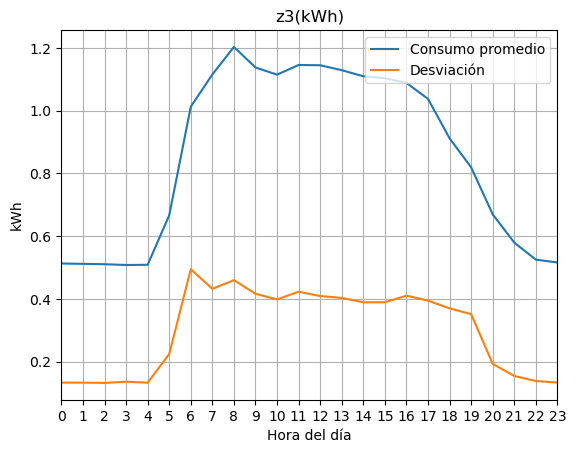

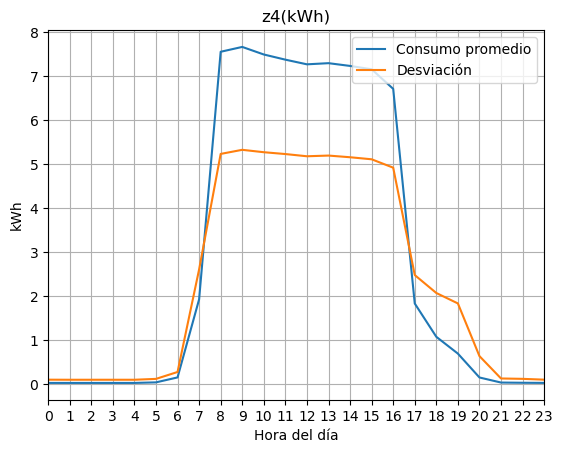

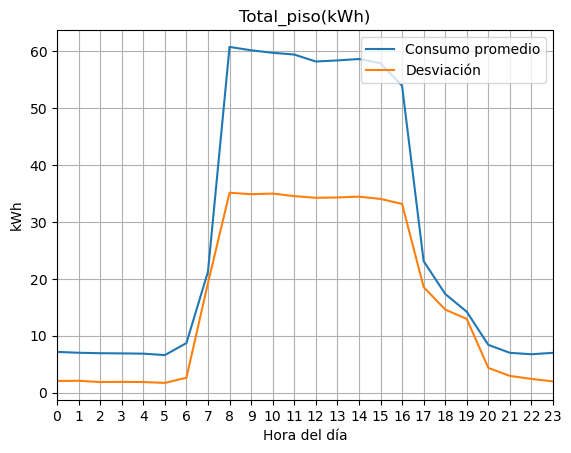

In [18]:
# Se grafica para cada equipo, zona y el piso
for i in kwh_columns:
  plt.figure()
  plt.plot(consumo_medio_hora[i], label=["Consumo promedio","Desviación"])
  plt.title(i)
  plt.xticks([i for i in range(24)])
  plt.legend(loc = "upper right")
  plt.xlim([0,23])
  plt.xlabel("Hora del día")
  plt.ylabel("kWh")
  plt.grid()
  plt.show()
  print()

In [19]:
# Energía consumida en cada día
consumo_día = (data.groupby(["Día-Fecha"]).mean(numeric_only=True)*24).reset_index()
consumo_día.columns = [consumo_día.columns[0]]+kwh_columns

# Se agrupa por cada día de la semana y se calcula consumo promedio y variabilidad
consumo_día["Día"] = pd.to_datetime(consumo_día["Día-Fecha"]).dt.weekday
consumo_medio_día = consumo_día[["Día"]+kwh_columns].groupby(["Día"]).aggregate(["mean","std"])
days = ["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]
consumo_medio_día.index = days

In [20]:
consumo_medio_día

z1_AC1(kWh)             z1_Light(kWh)            z1_Plug(kWh)  \
                 mean         std          mean        std         mean   
Lunes      252.912880  122.637272     76.180405  36.425633    30.939484   
Martes     268.769910   97.103769     84.722071  28.891951    34.251628   
Miércoles  277.294650   77.453676     90.151856  22.085995    36.308720   
Jueves     278.931170   52.097746     90.851124  18.435770    36.563944   
Viernes    274.808187   66.372142     91.037353  16.214205    35.869103   
Sábado      56.992583   90.314936     15.169526  22.019069     7.307211   
Domingo     21.775099   64.465627      9.051846  14.354177     5.651279   

                     z2_AC1(kWh)            z2_AC2(kWh)            ...  \
                 std        mean        std        mean       std  ...   
Lunes      12.948045  173.803829  92.528812   15.226712  2.473898  ...   
Martes     10.073976  192.098744  81.798029   15.168845  3.091949  ...   
Miércoles   7.190247  202.678527  71.664918   15.545349  2.918598  ...   
Jueves      5.870303  206.931640  61.896932   15.238514  2.711063  ...   
Viernes     6.485789  205.044281  68.455097   15.117613  2.702223  ...   
Sábado      3.691059   23.884581  39.215023   14.691859  1.742622  ...   
Domingo     2.277973   15.273446  24.294219   15.122837  1.668346  ...   

              z1(kWh)                 z2(kWh)                z3(kWh)  \
                 mean         std        mean         std       mean   
Lunes      360.032768  169.019971  326.758257  101.076841  22.243156   
Martes     387.743610  132.105710  345.730429   85.357632  22.572469   
Miércoles  403.755226  100.050097  357.048857   70.601859  23.569824   
Jueves     406.346238   68.346970  359.315480   60.884546  23.798416   
Viernes    401.714643   81.584392  356.960266   65.765340  24.228473   
Sábado      79.469320  112.572832  153.522086   38.935007  14.113883   
Domingo     36.478224   75.475886  146.676588   31.045533  13.538702   

                        z4(kWh)            Total_piso(kWh)              
                std        mean        std            mean         std  
Lunes      4.831299   88.901248  44.847010      797.935430  307.736018  
Martes     4.490614   97.368122  36.230701      853.414630  241.515677  
Miércoles  3.515538   99.719541  29.126299      884.093448  181.923855  
Jueves     2.843933  102.682846  22.190102      892.142980  130.621120  
Viernes    2.611547  100.071749  24.117420      882.975130  152.098819  
Sábado     4.158678    8.797852  23.737468      255.903141  149.921411  
Domingo    3.418788    2.621157   6.139672      199.314671   80.157115  

[7 rows x 58 columns]

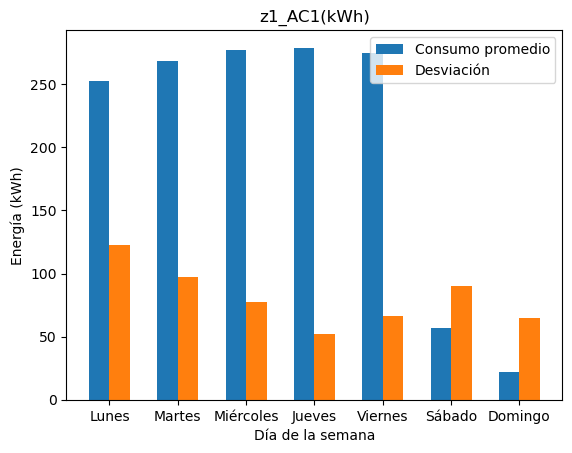

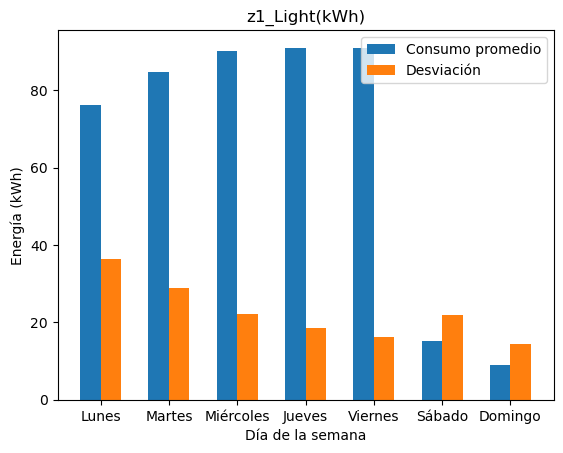

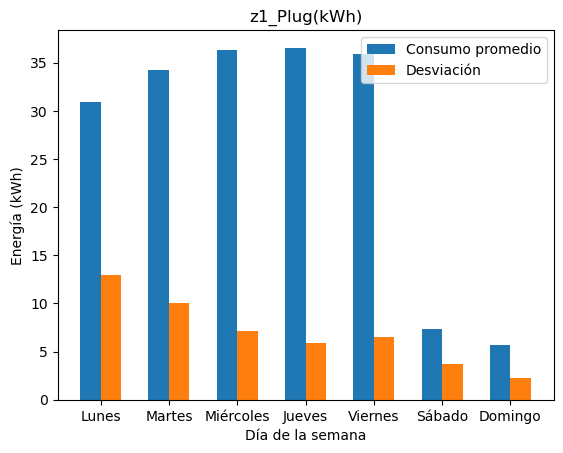

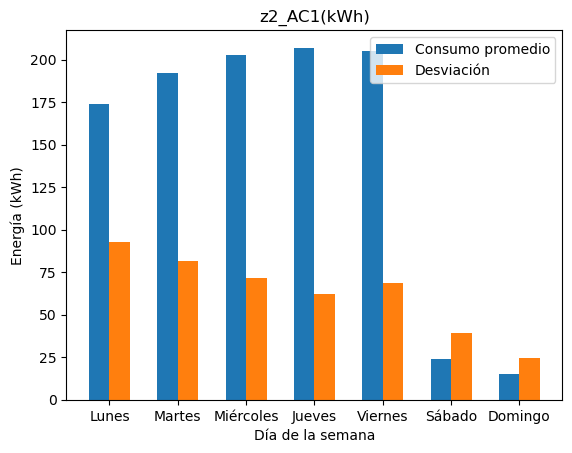

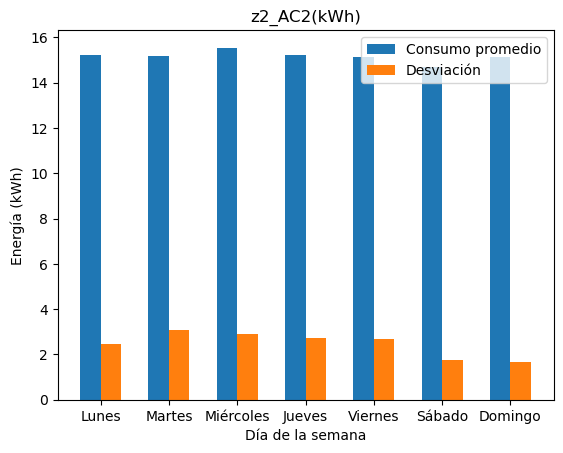

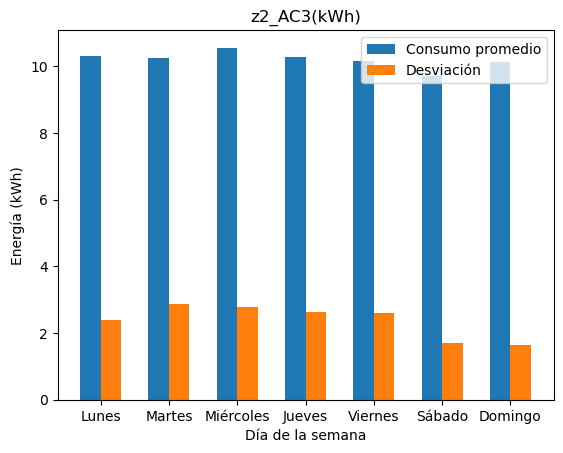

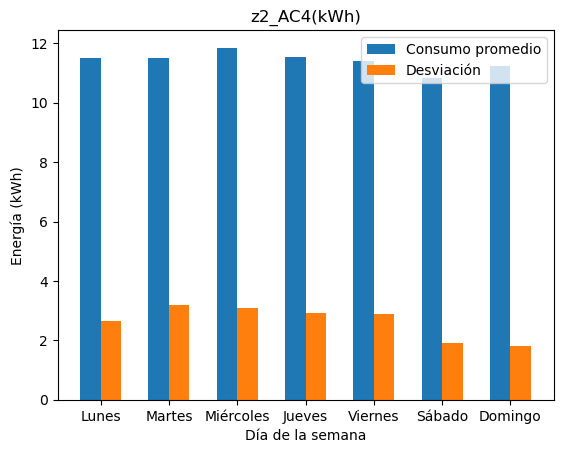

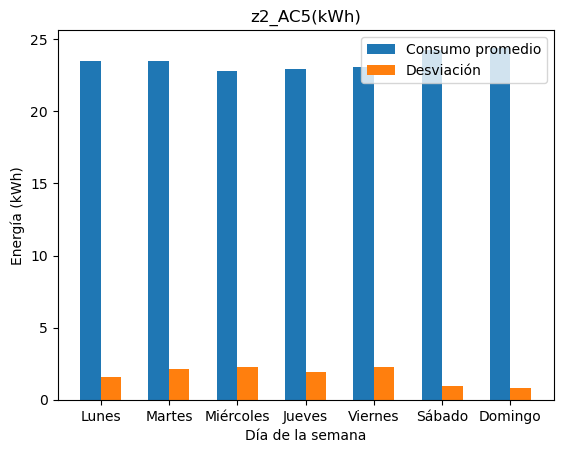

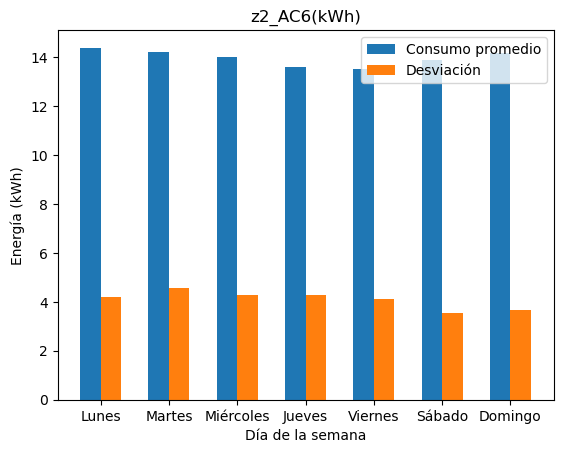

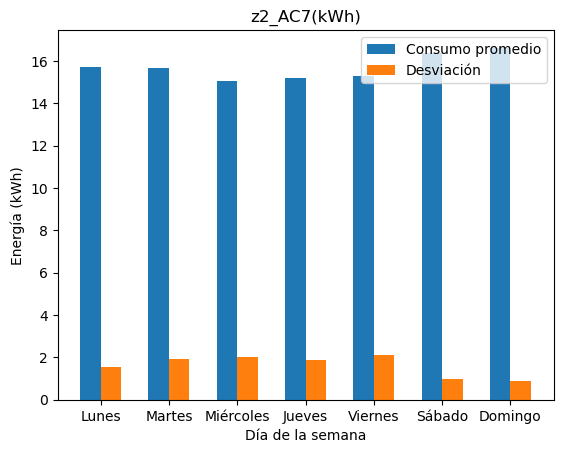

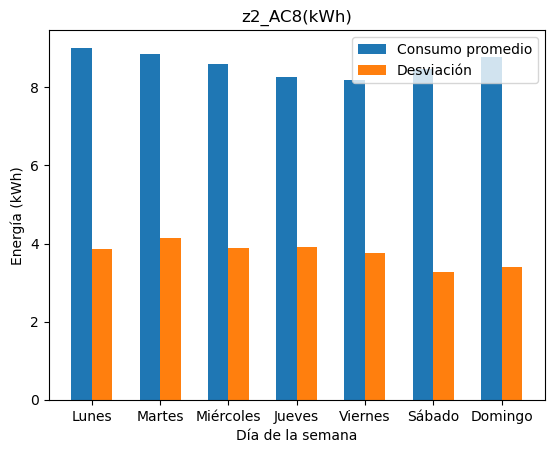

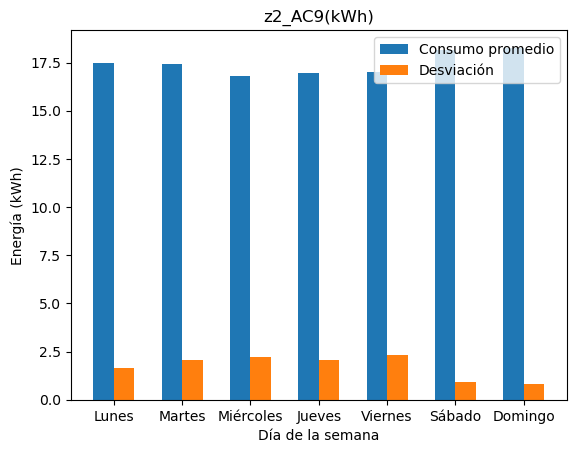

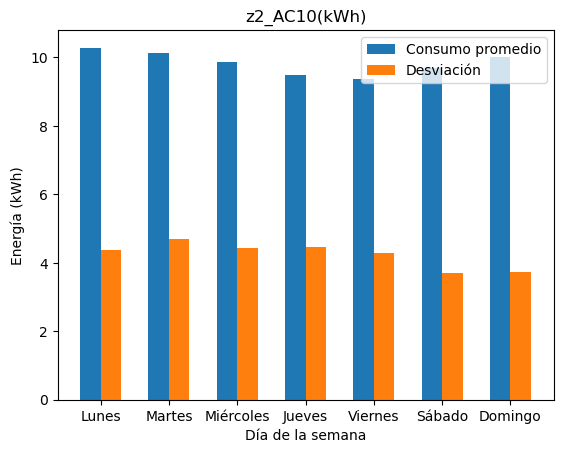

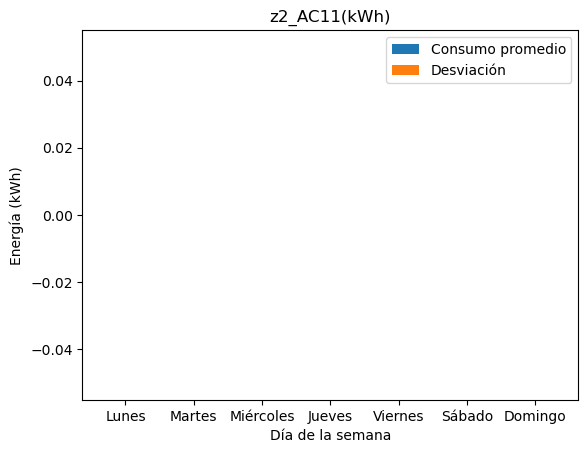

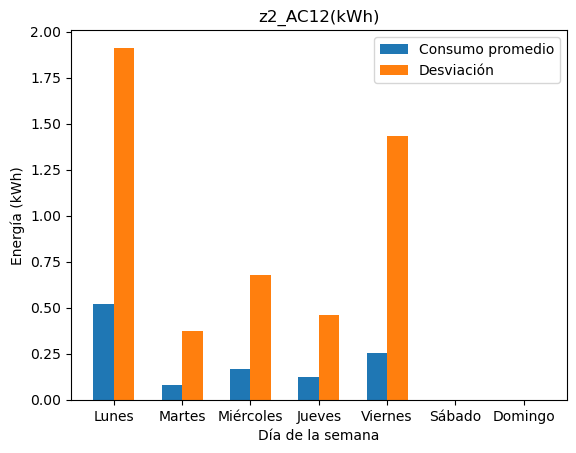

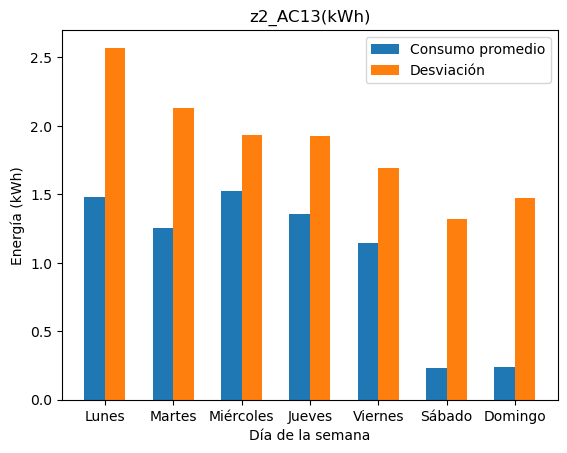

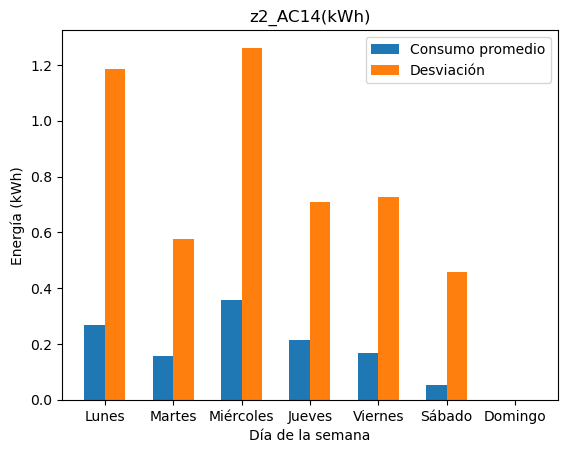

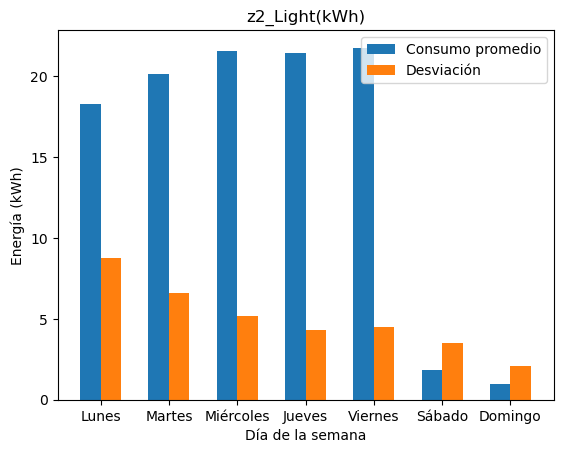

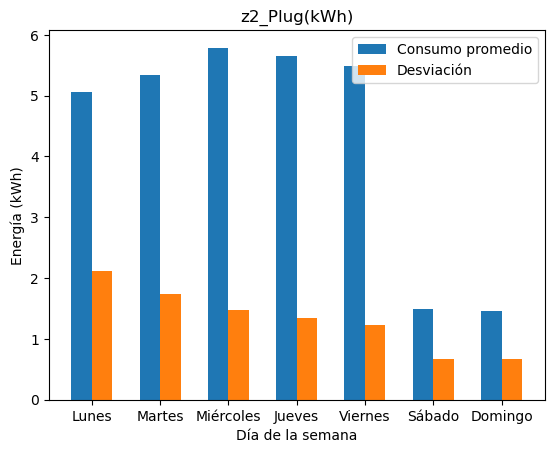

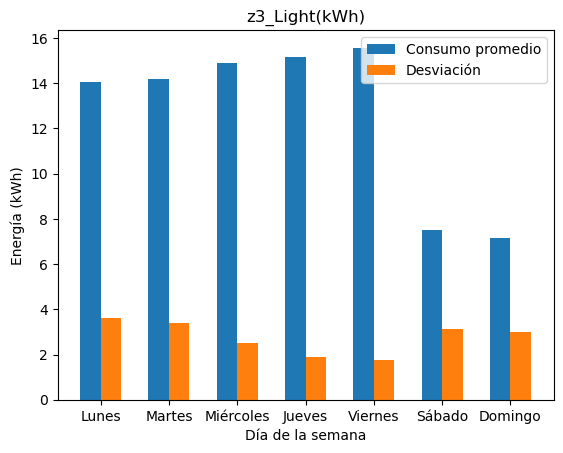

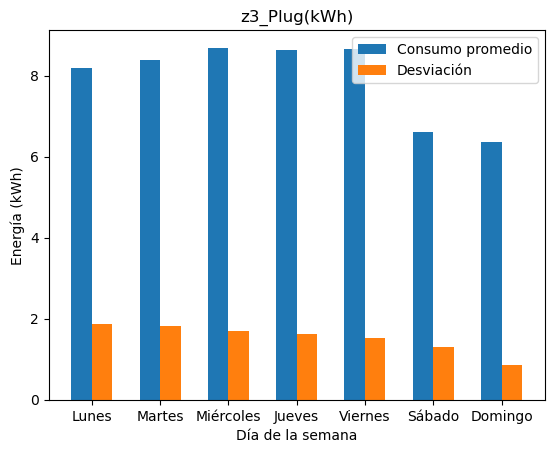

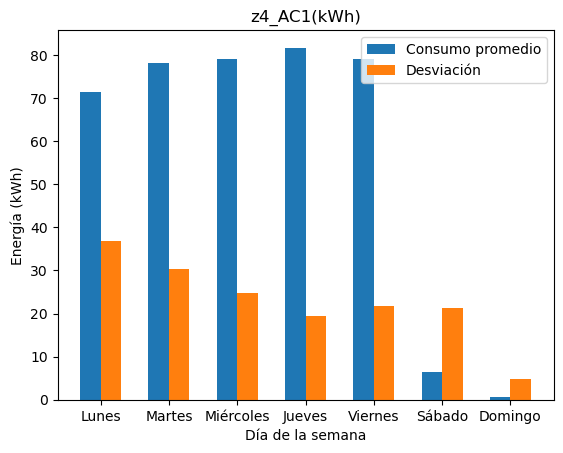

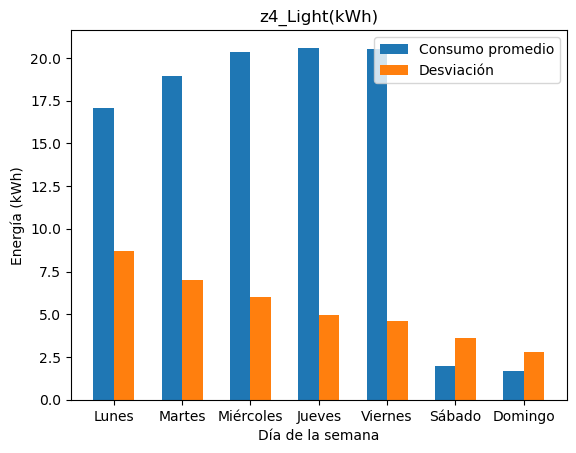

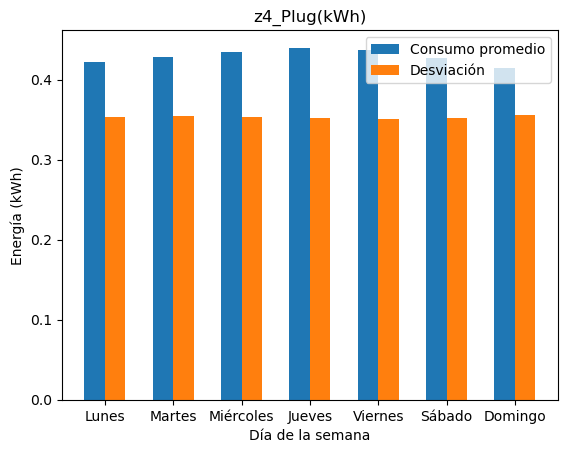

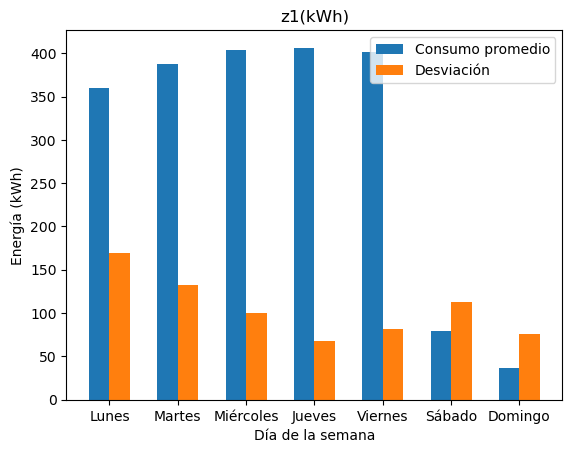

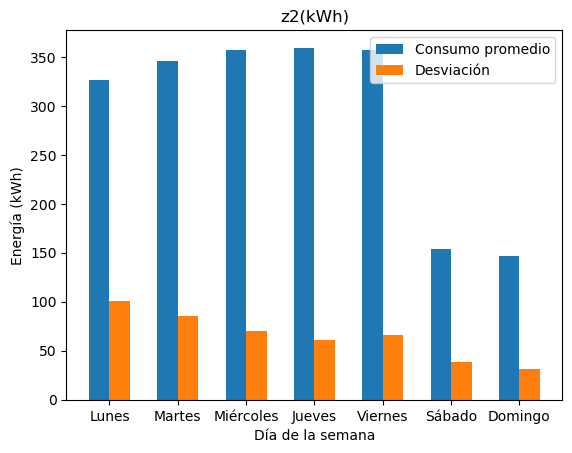

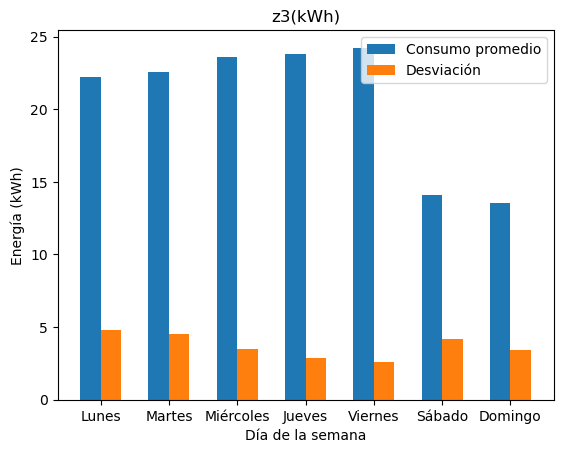

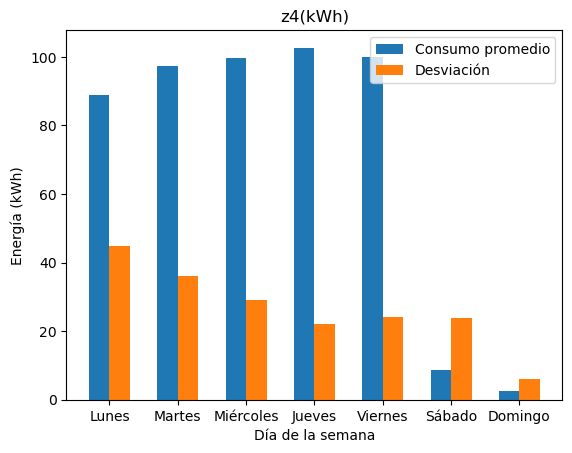

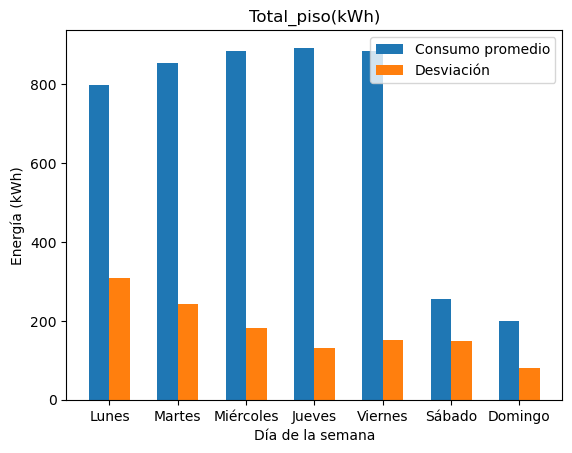

In [21]:
# Se grafica para cada equipo, zona y el piso
bar_with = 0.3

for i in kwh_columns:
  plt.figure()
  plt.bar(np.arange(7)-bar_with/2, consumo_medio_día[i]["mean"], bar_with, label="Consumo promedio")
  plt.bar(np.arange(7)+bar_with/2, consumo_medio_día[i]["std"], bar_with, label="Desviación")
  plt.xticks(ticks = np.arange(7), labels=days)
  plt.title(i)
  plt.legend(loc = "upper right")
  plt.xlabel("Día de la semana")
  plt.ylabel("Energía (kWh)")
  plt.show()
  print()

In [22]:
# Se calcula la potencia media consumida en cada mes
consumo_mes = (data.groupby("Mes-Fecha").mean(numeric_only=True))

# Se obtiene el número de días que transcurrieron en cada mes
def obtener_dias_en_mes(fecha):
    year, month = map(int, fecha.split('-'))
    return calendar.monthrange(year, month)[1]

num_dias = pd.Series(consumo_mes.index, index=consumo_mes.index).apply(obtener_dias_en_mes)

# Se calcula la energía total consumida en cada mes
consumo_mes_kwh = consumo_mes.mul(num_dias,axis=0)*24
consumo_mes_kwh.columns = kwh_columns

In [23]:
consumo_mes_kwh

,z1_AC1(kWh),z1_Light(kWh),z1_Plug(kWh),z2_AC1(kWh),z2_AC2(kWh),z2_AC3(kWh),z2_AC4(kWh),z2_AC5(kWh),z2_AC6(kWh),z2_AC7(kWh),...,z3_Light(kWh),z3_Plug(kWh),z4_AC1(kWh),z4_Light(kWh),z4_Plug(kWh),z1(kWh),z2(kWh),z3(kWh),z4(kWh),Total_piso(kWh)
Mes-Fecha,,,,,,,,,,,,,,,,,,,,,
2018-07,6761.627134,2483.989203,857.200540,6047.942995,449.855912,296.886703,337.645015,670.769760,340.466515,434.391199,...,380.245690,321.482182,2322.627042,630.832482,0.000000,10102.816877,10202.714941,701.727872,2953.459523,23960.719213
2018-08,7187.472105,2597.983109,922.811739,3329.316535,498.601923,343.200775,389.726721,735.173838,459.036513,490.948138,...,405.623923,318.668020,2162.271874,614.504669,0.000000,10708.266953,8129.695826,724.291943,2776.776543,22339.031265
2018-09,6675.419762,2511.397535,852.794652,2390.707332,555.450345,402.762147,453.867558,696.190850,518.659870,459.590725,...,418.210152,314.649843,2046.297723,600.886066,0.000000,10039.611949,7441.337623,732.859996,2647.183789,20860.993357
2018-10,5724.997753,2106.120865,765.977985,3395.502540,552.563661,399.220771,442.780784,704.976698,539.766481,468.377150,...,372.972773,295.500314,1980.772454,456.075457,0.000000,8597.096602,8505.262343,668.473087,2436.847911,20207.679943
2018-11,5690.421797,1821.918947,759.995515,3502.001297,418.932172,271.742366,303.944525,716.351124,513.641147,480.395904,...,366.536750,215.420991,2079.144877,399.117075,0.000000,8272.336259,8073.111348,581.957741,2478.261953,19405.667300
2018-12,5142.168642,1648.161478,642.375317,3009.112570,445.462661,290.111132,323.891847,751.797089,523.121664,507.153217,...,334.208576,211.076976,1399.708208,347.294790,0.000000,7432.705438,7708.507312,545.285552,1747.002999,17433.501300
2019-01,4849.037809,1848.677918,742.573863,3361.720944,393.169994,240.920440,268.790913,744.350153,578.057115,501.614207,...,378.878223,210.659227,1298.217696,402.587698,0.000000,7440.289590,8198.419162,589.537451,1700.805394,17929.051597
2019-02,5262.185100,1690.309953,684.150436,5396.901785,357.750843,223.789352,248.743565,695.589043,531.567007,477.426414,...,345.398129,186.675860,1435.545378,348.539017,20.070986,7636.645489,9849.324602,532.073988,1804.155381,19822.199460
2019-03,6377.429317,1794.553542,766.930886,6193.668953,423.158170,273.208758,302.952919,748.609652,547.303166,511.200559,...,384.890454,209.999435,1871.659346,421.168456,22.220798,8938.913745,10974.937503,594.889889,2315.048600,22823.789736


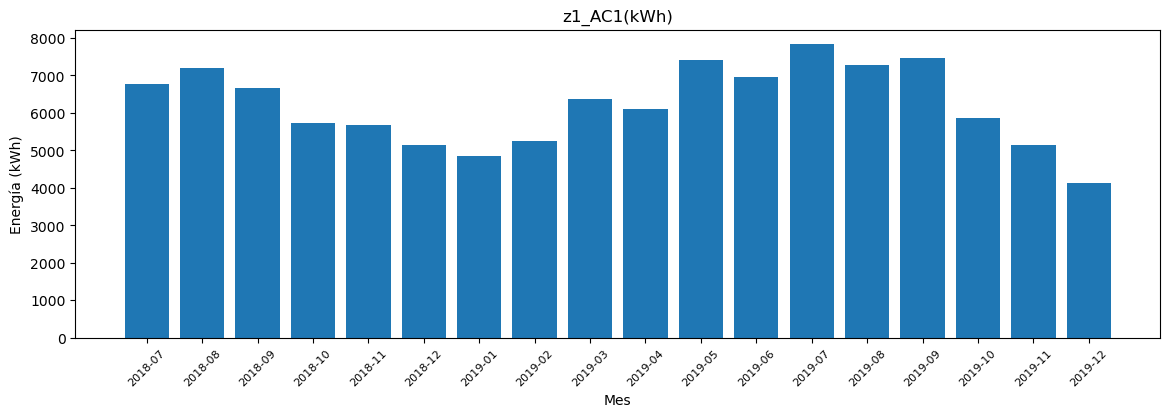

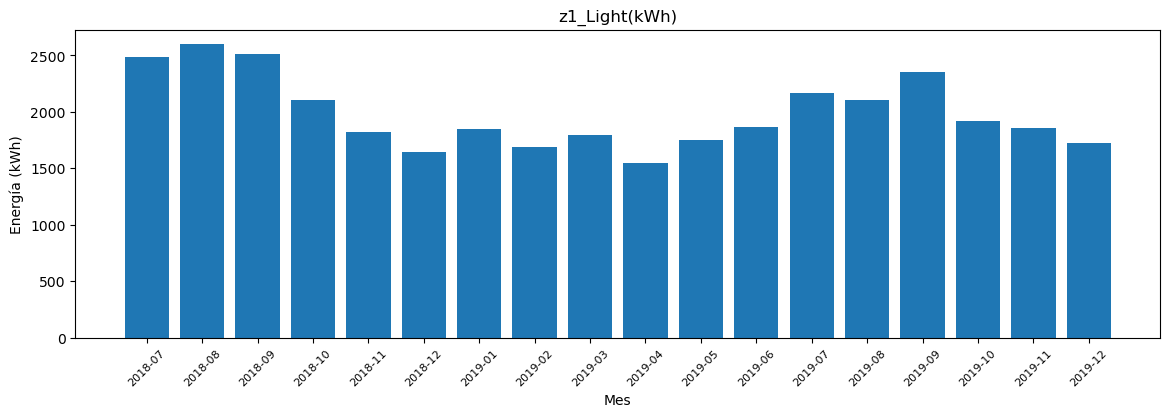

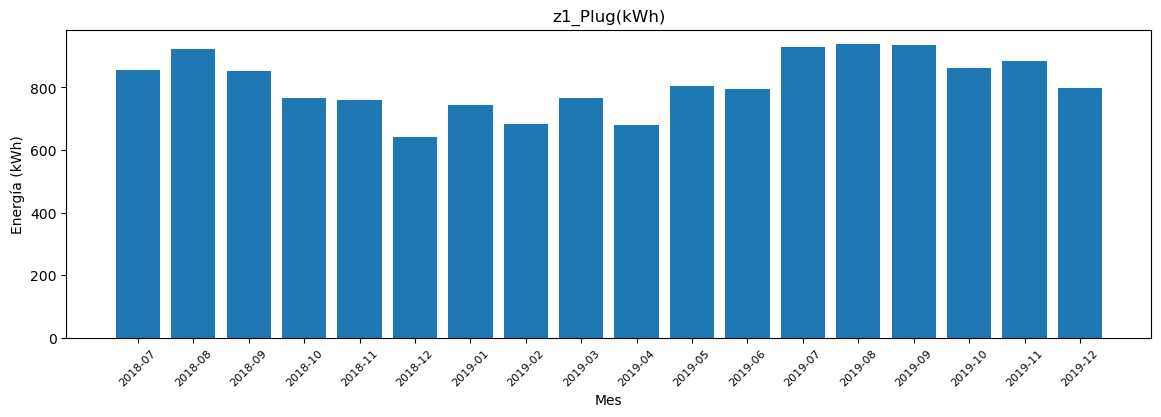

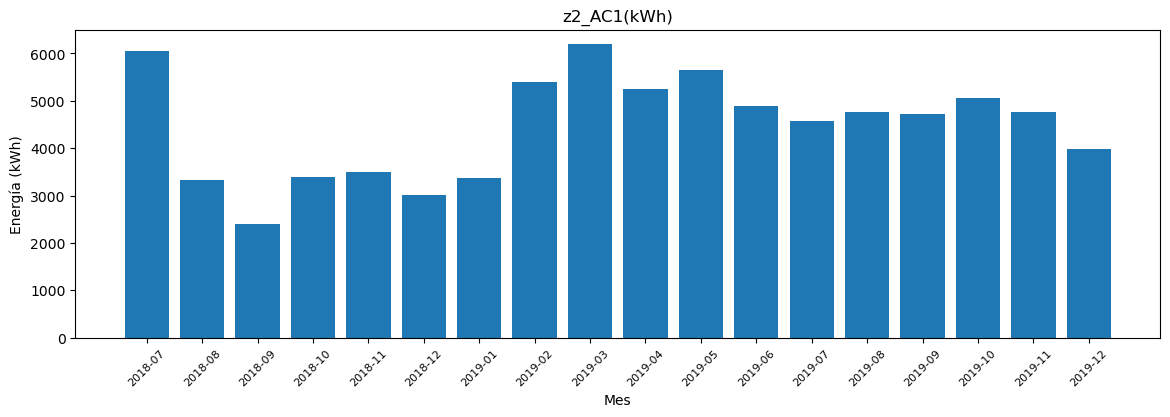

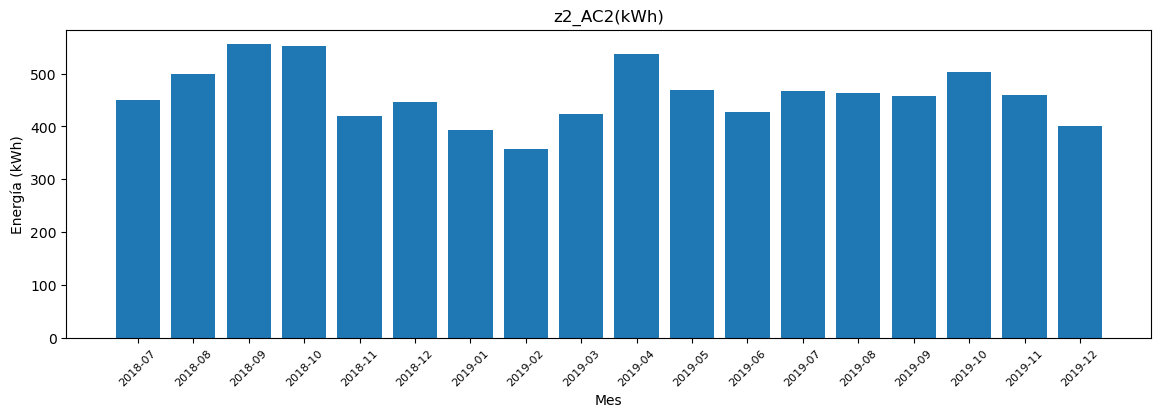

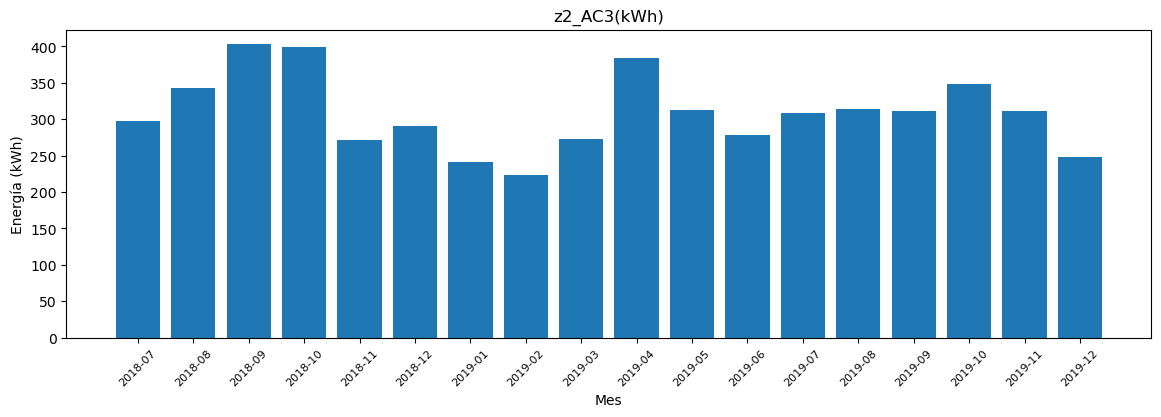

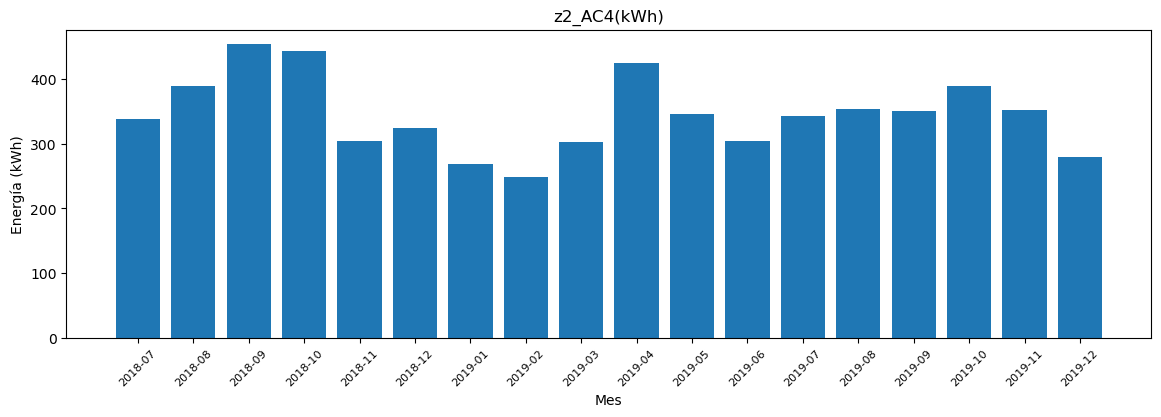

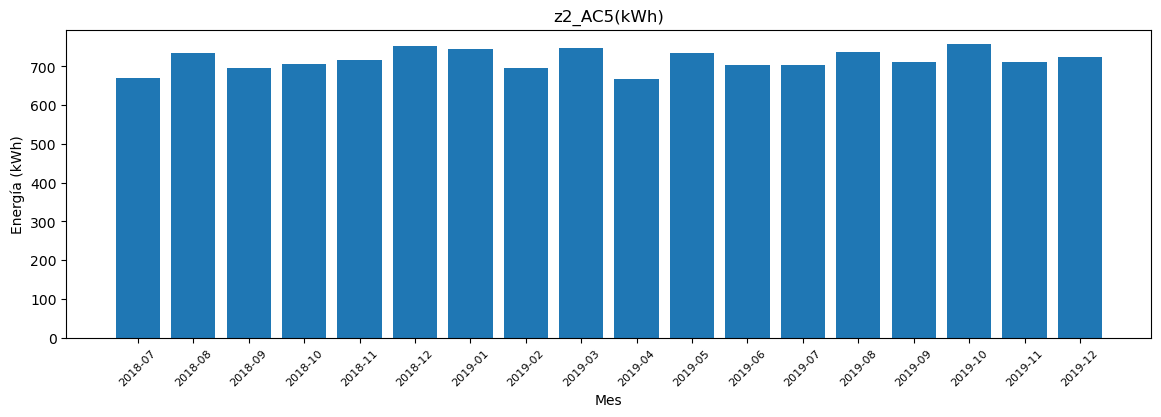

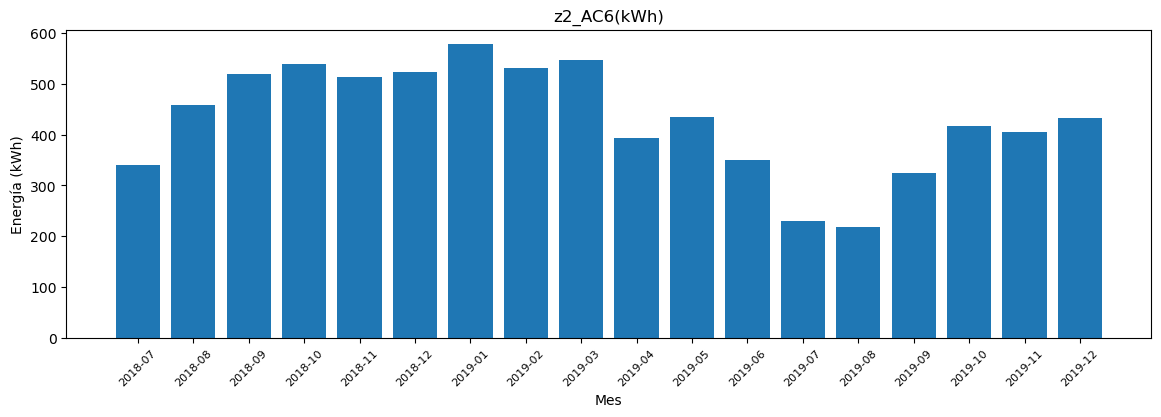

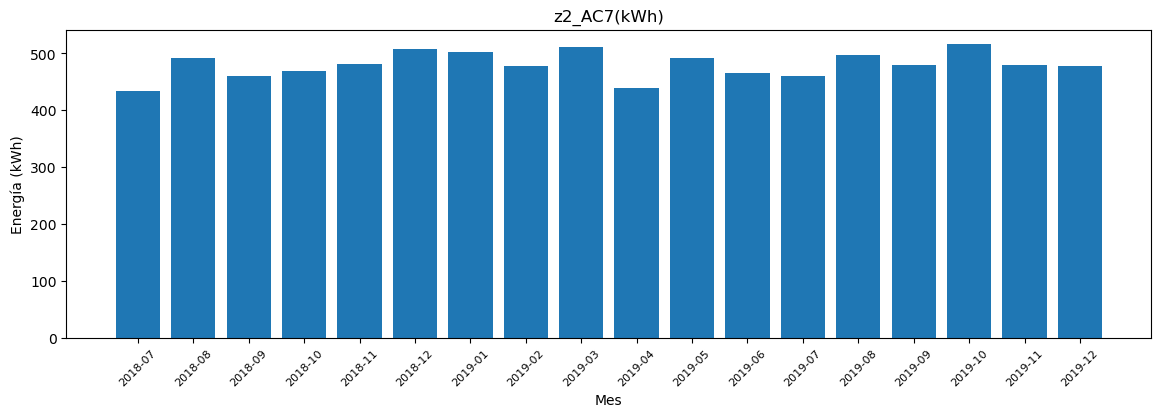

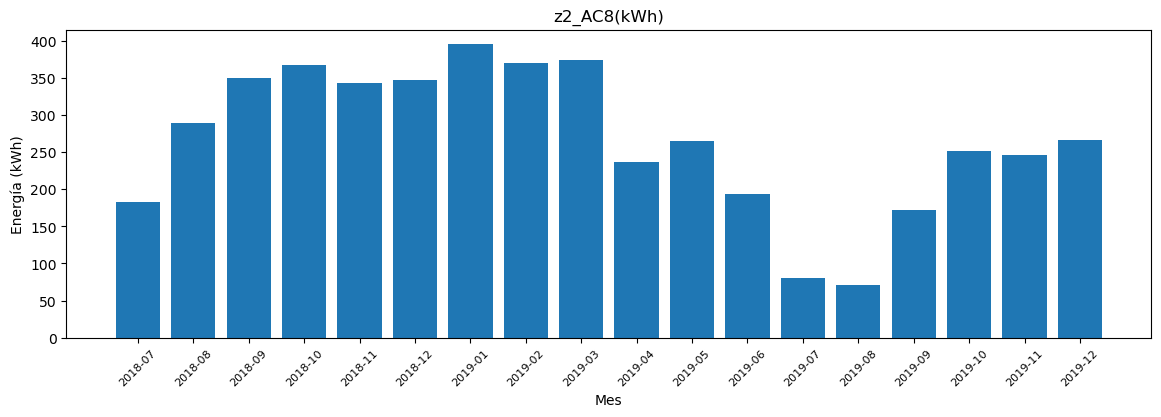

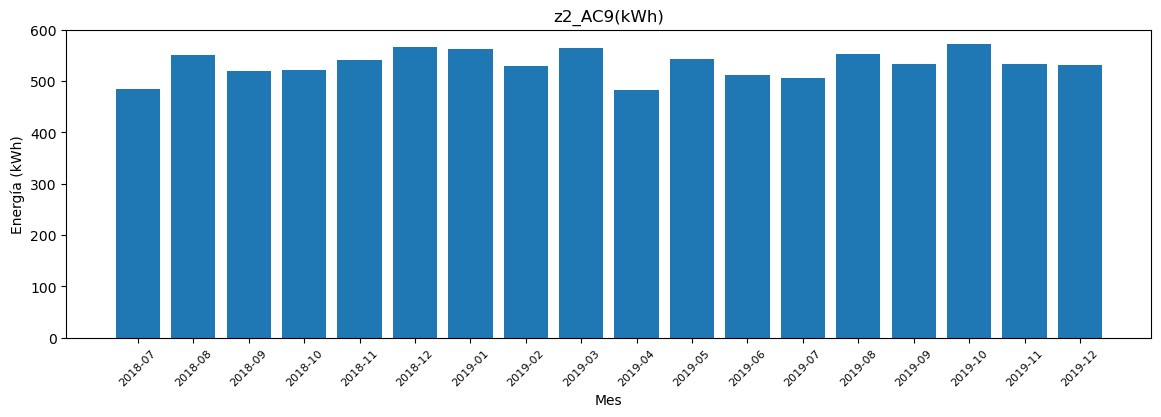

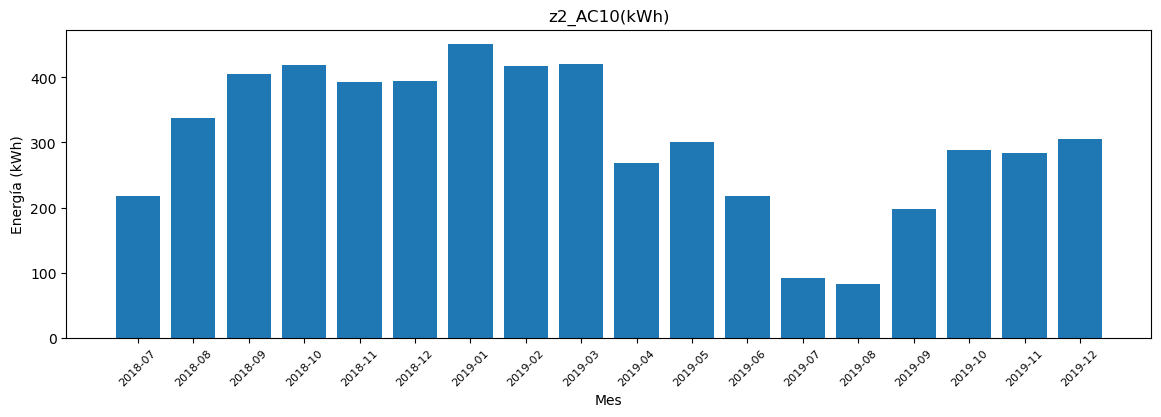

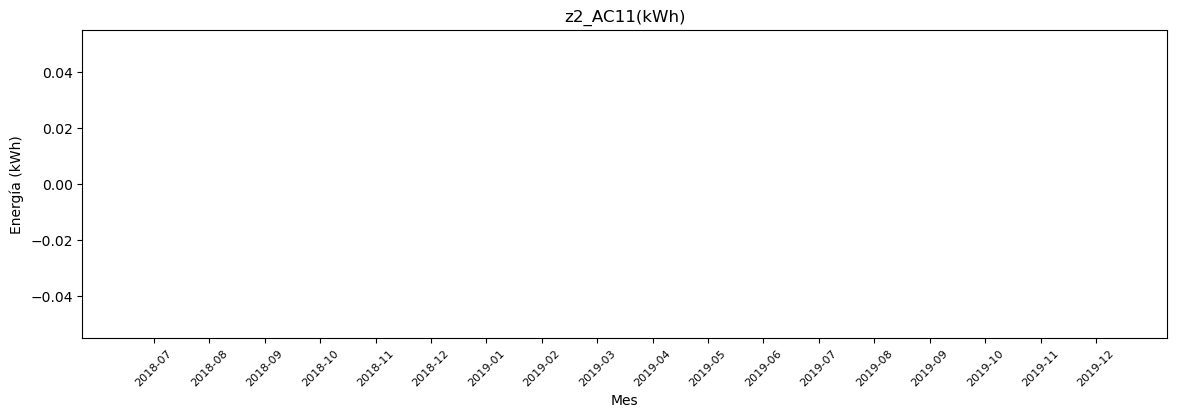

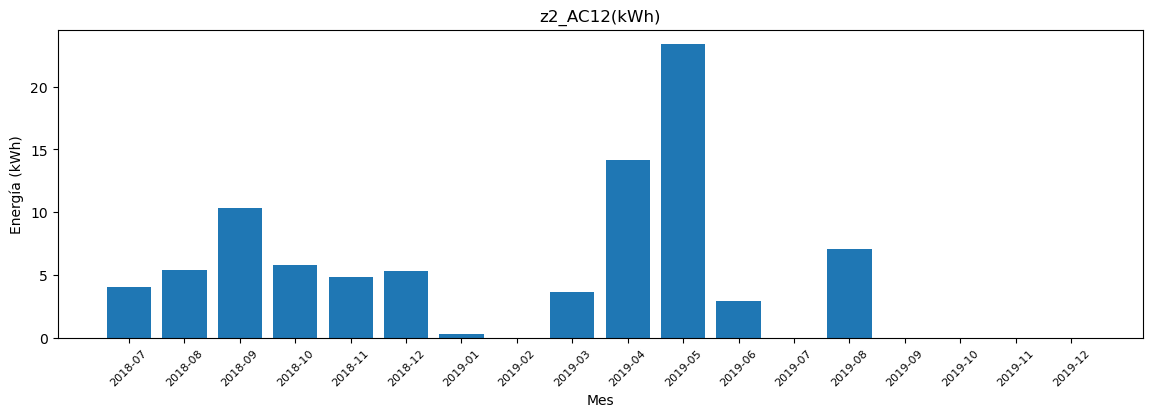

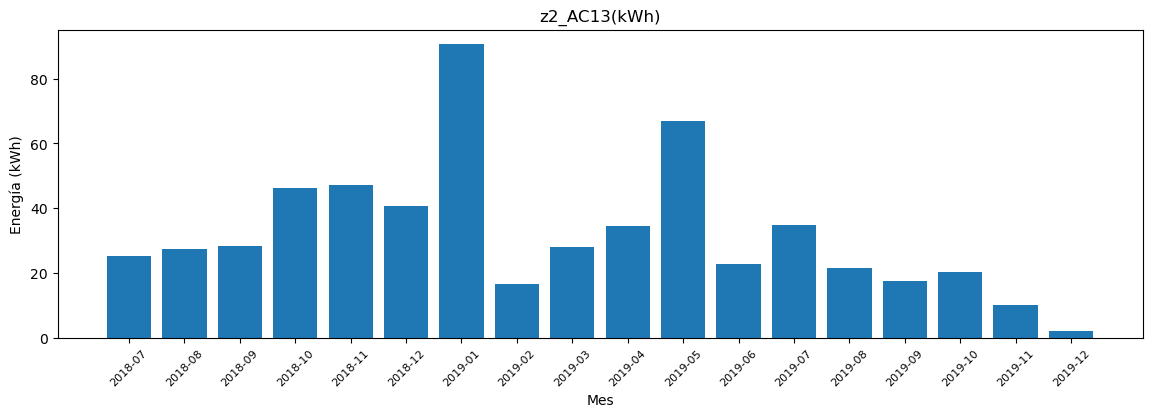

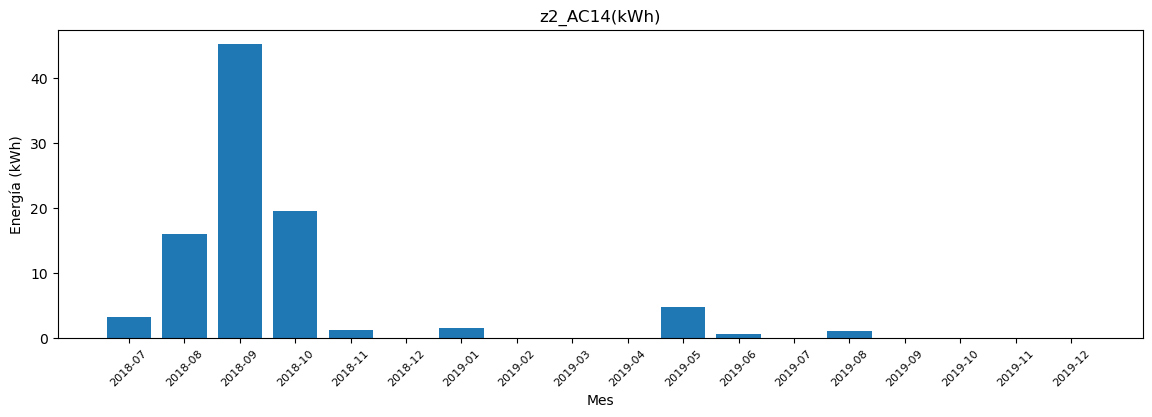

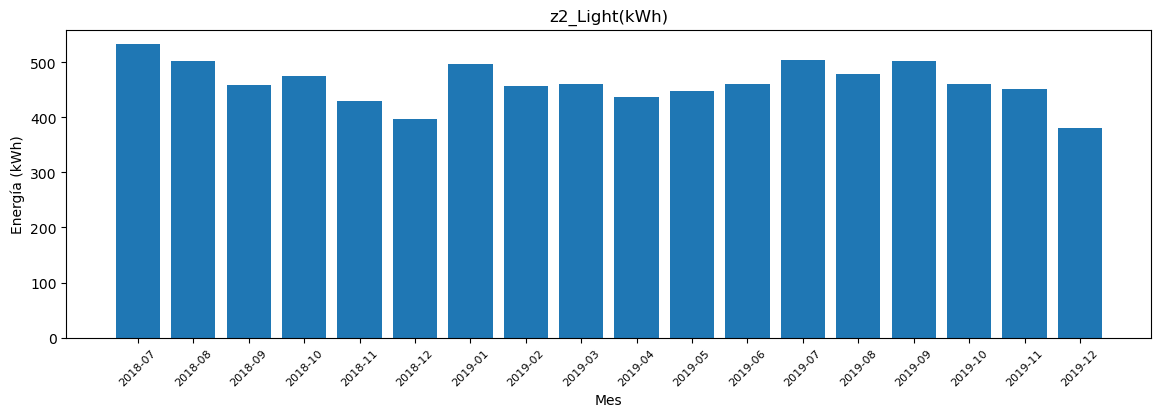

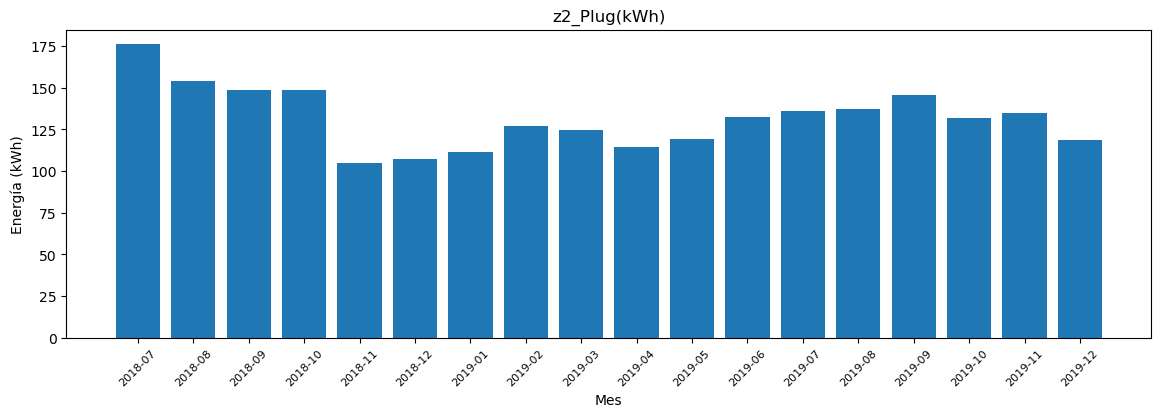

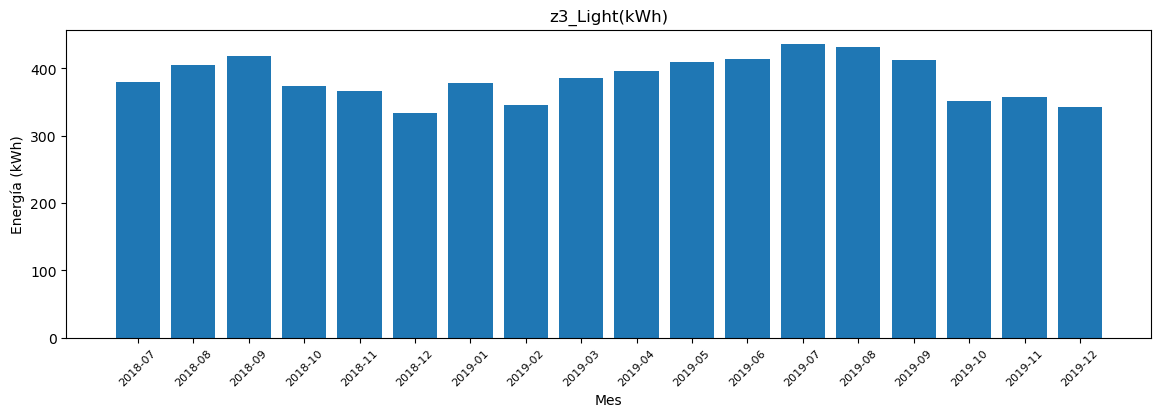

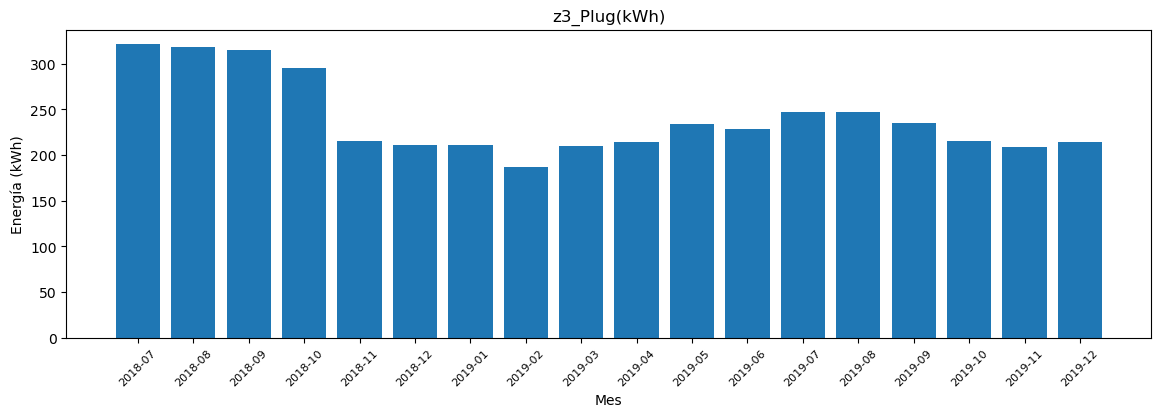

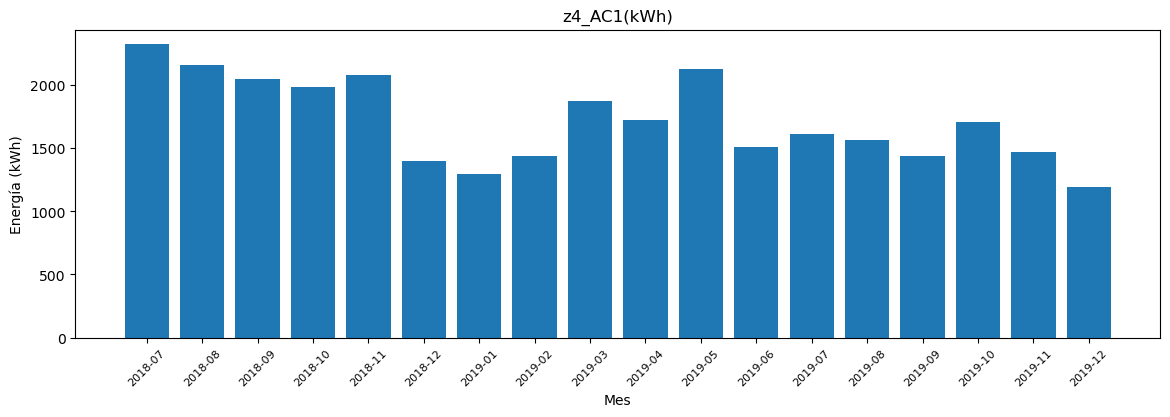

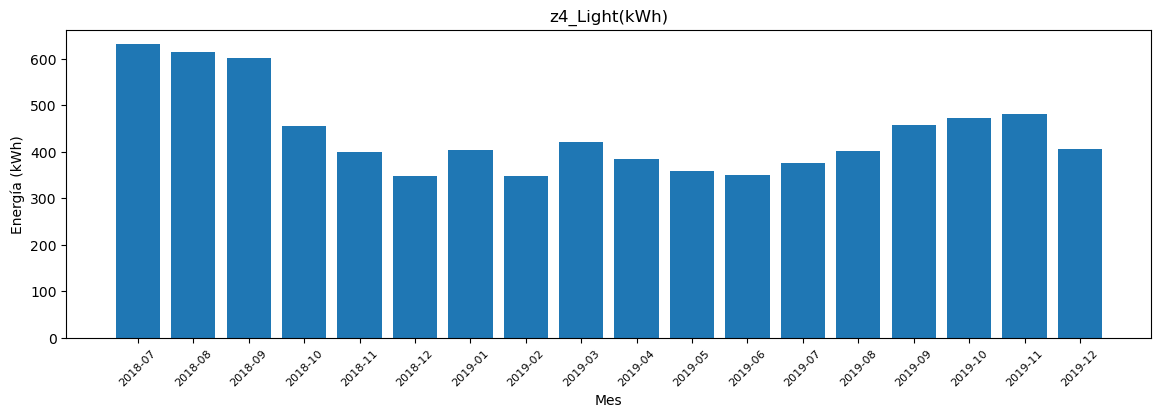

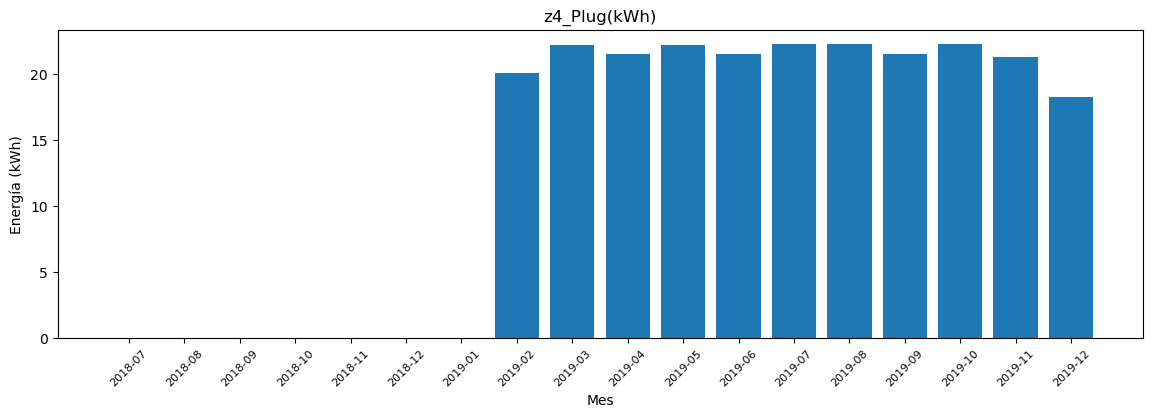

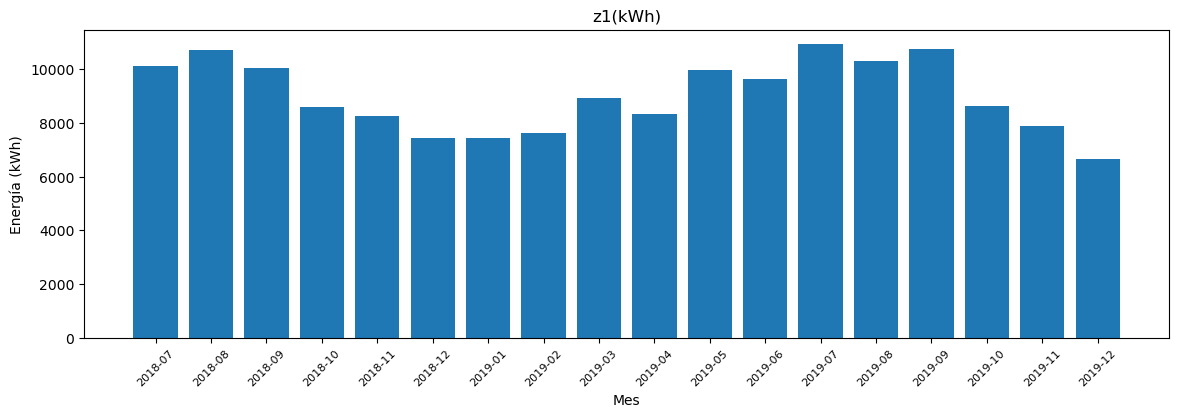

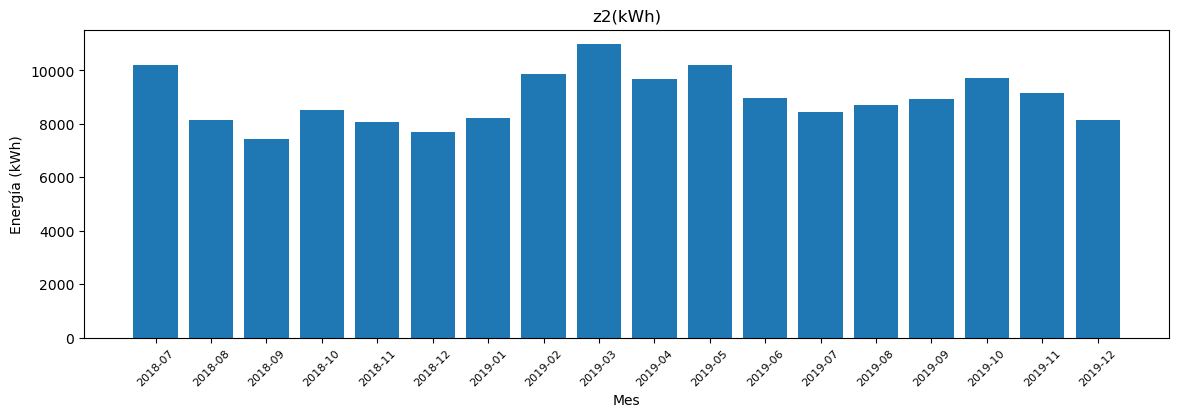

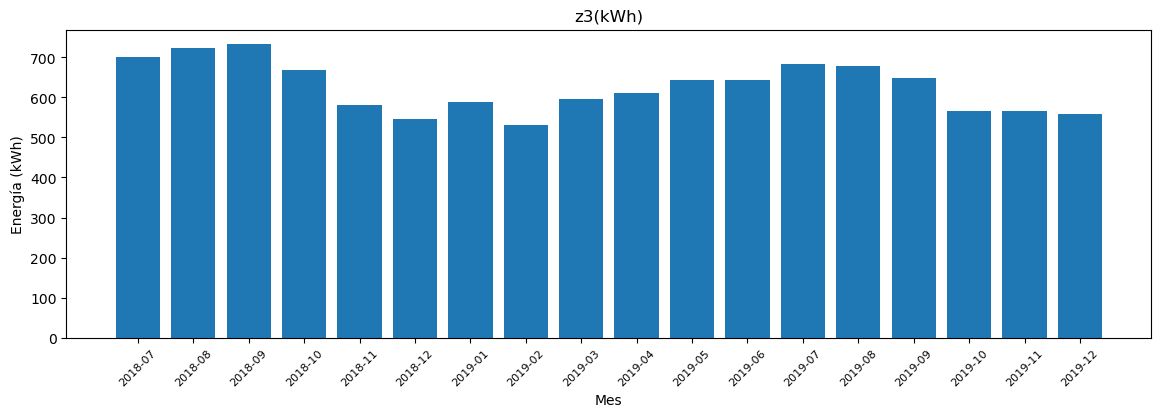

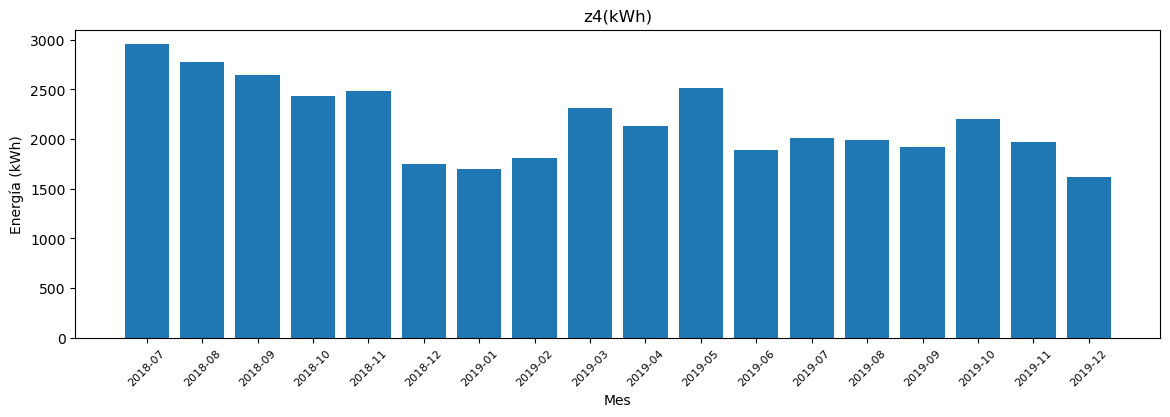

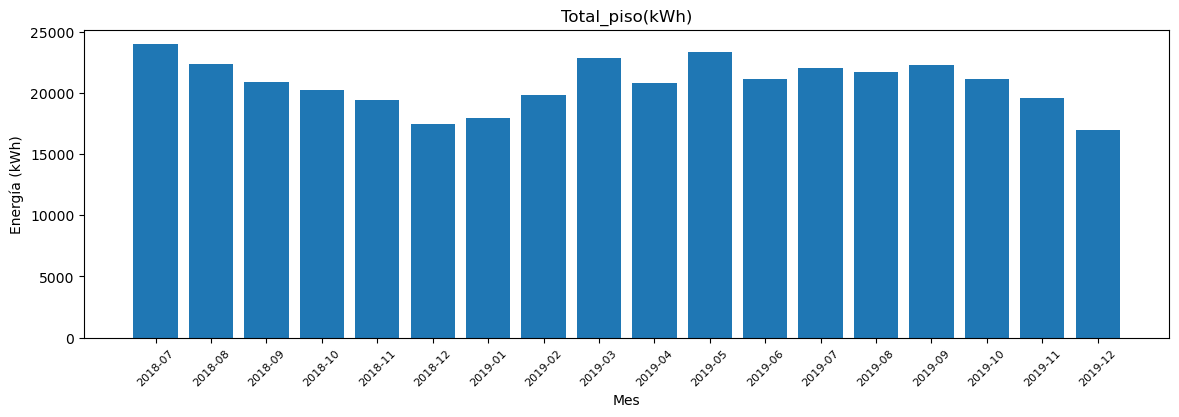

In [24]:
# Se grafica para cada equipo, zona y el piso
for i in kwh_columns:
  plt.figure(figsize = (14, 4))
  plt.bar(x = consumo_mes_kwh.index, height = consumo_mes_kwh[i])
  plt.plot()
  plt.title(i)
  plt.xlabel("Mes")
  plt.ylabel("Energía (kWh)")
  plt.xticks(rotation = 45, fontsize = 8)
  plt.show()
  print()

plt.show()